### “The goal of forecasting is not to predict the future but to tell you what you need to know to take meaningful action in the present.” - Paul Saffo

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

Business understanding – What does the business need?  
Data understanding – What data do we have / need? Is it clean?  
Data preparation – How do we organize the data for modeling?  
Modeling – What modeling techniques should we apply?  
Evaluation – Which model best meets the business objectives?  
Deployment – How do stakeholders access the results?  

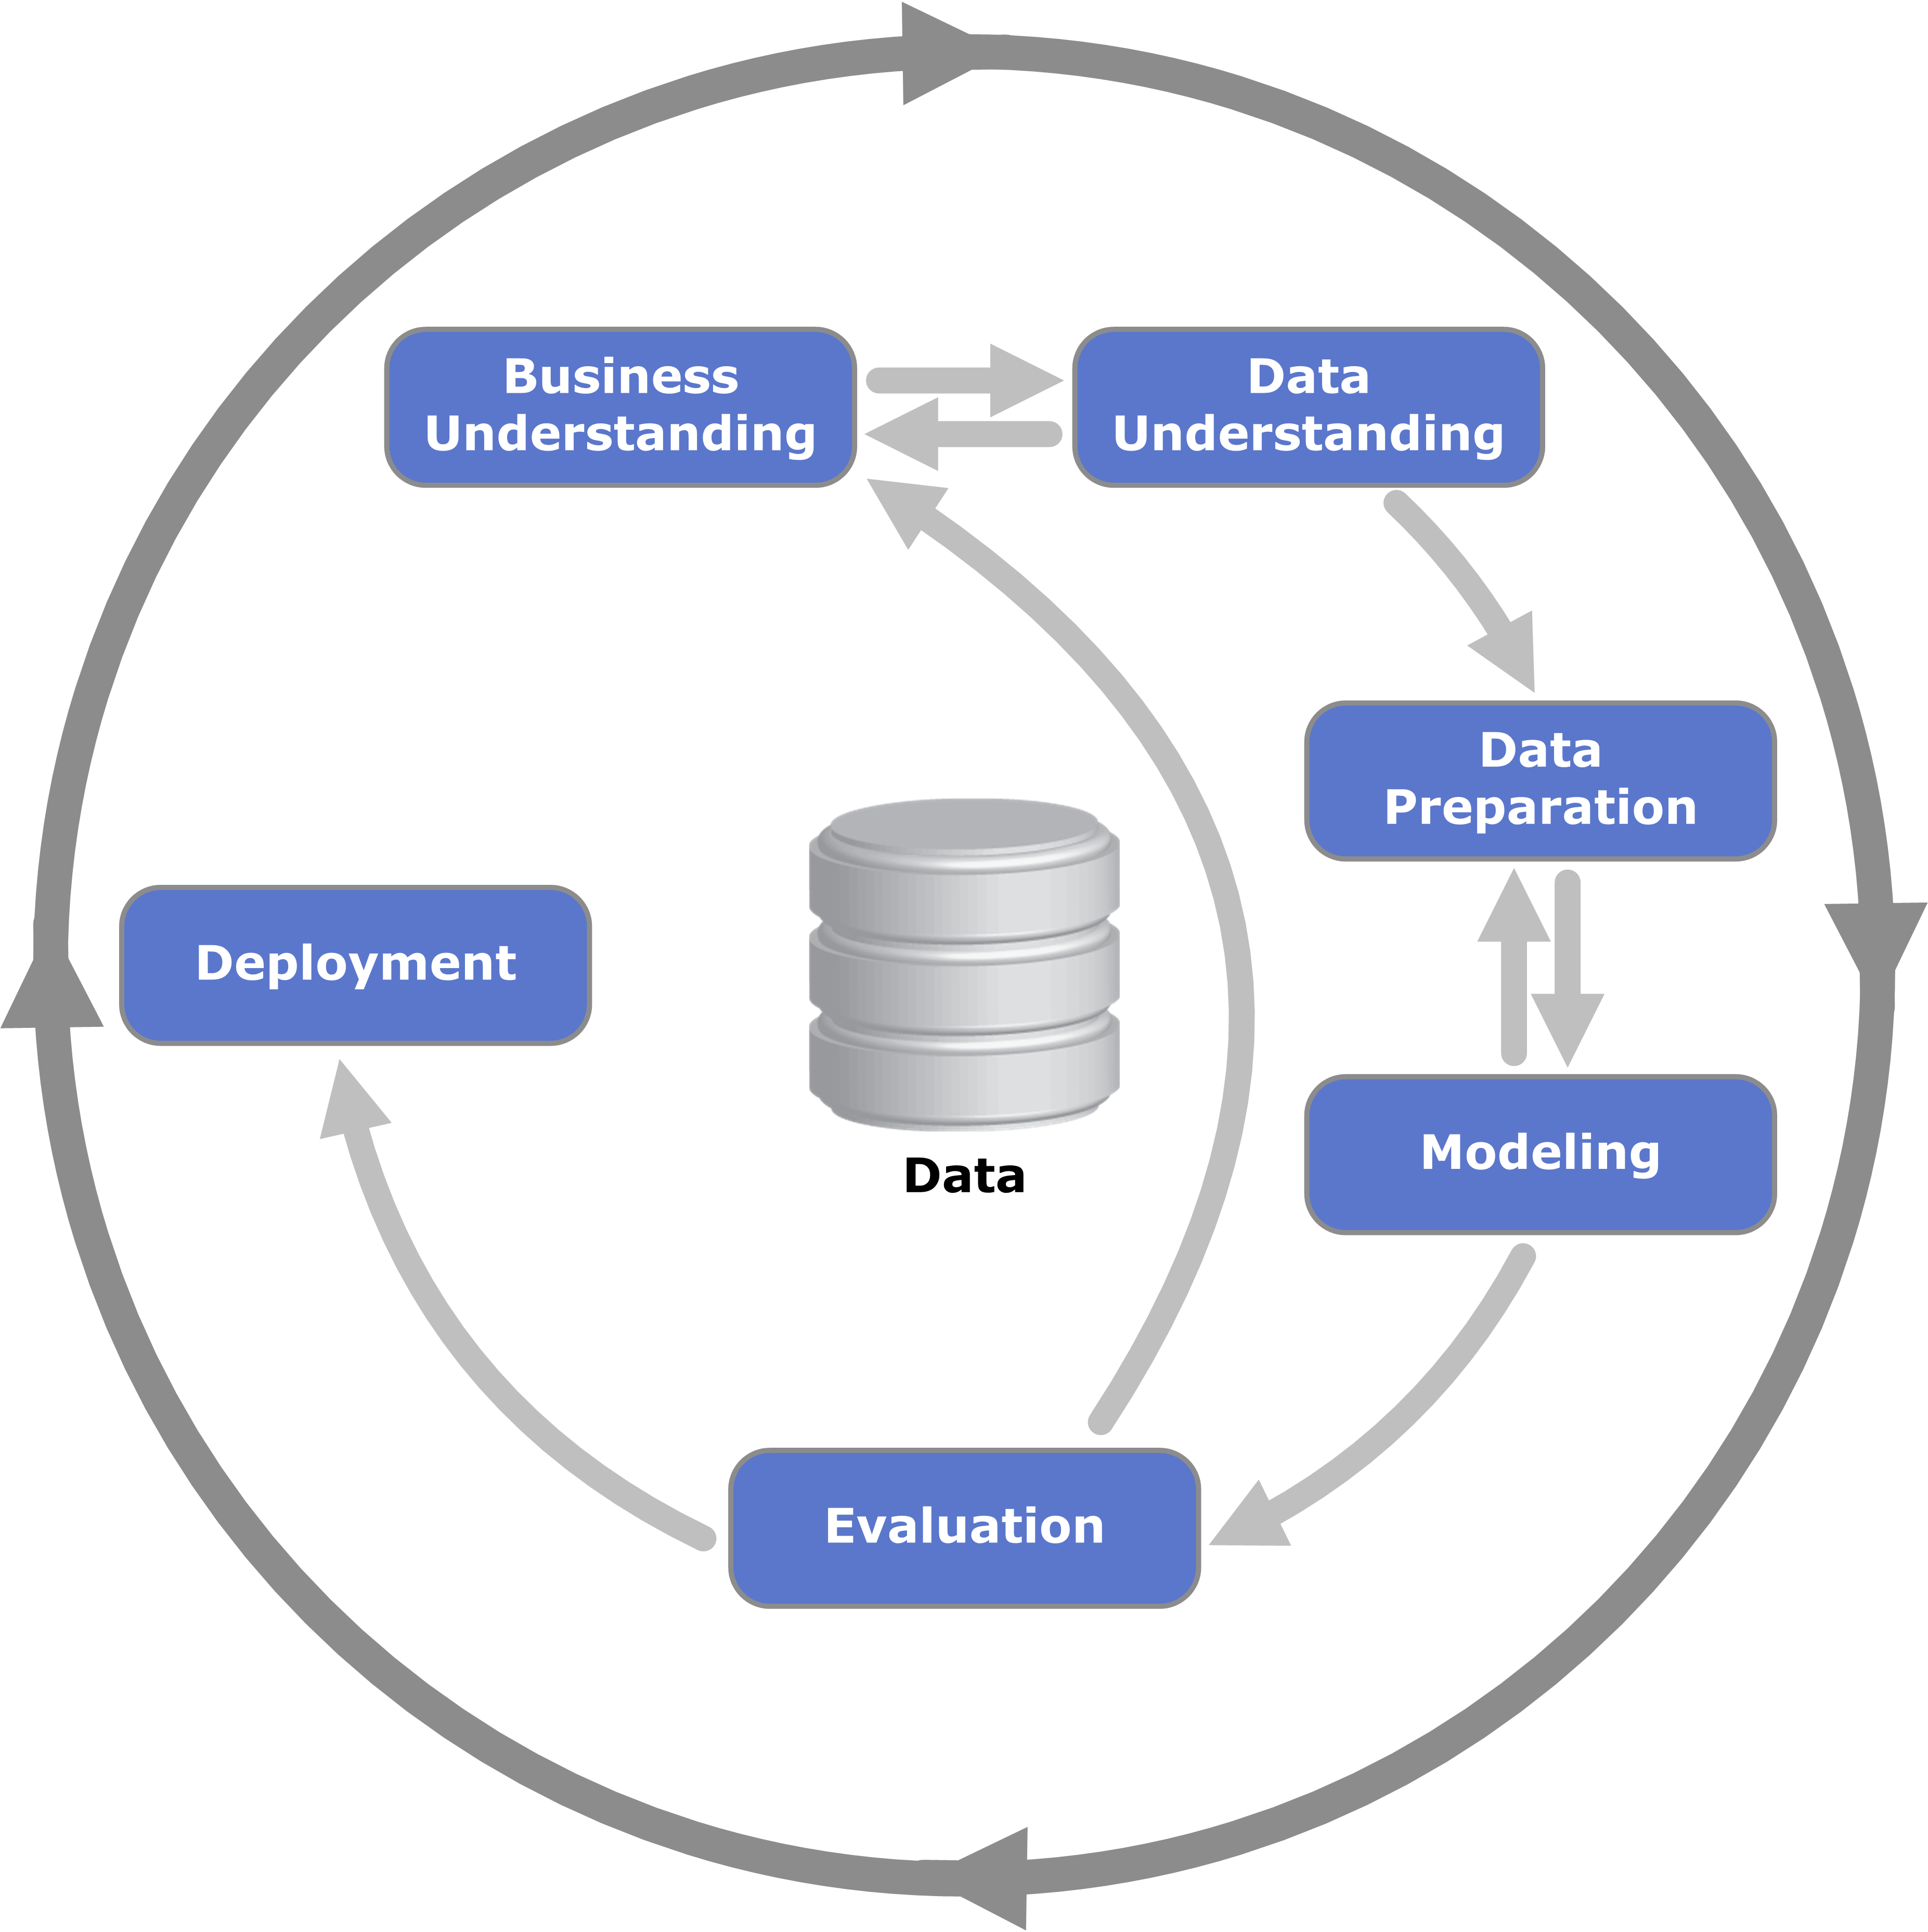

### 1. Business Understanding: 

Loan disbursal and credit risks are fundamental financial processes which require a scientific and nimble analysis. Under various kinds of loans, Home Credit loans become even more complicated owing to the wide variations and types of customers involved. The Home Credit risk mainly involves two main angles:
1. Customers struggle to get loans due to poor credit histories and gaps in undesrtanding the financial intricacies. This jeopardises their position and leaves them at the mercy of unfair lenders.
2. More importantly, the financial institutions should not incur losses by approving loans owing to shoddy credit histories of the customers. By evolving a robust model to predict how capable each applicant is of repaying a loan, the institution can earn high profits and minimise the risk of defaulters. Furthermore, they can expand their business and extend financial inclusion to the unbanked population by providing a positive and safe borrowing experience. 




### 2. Data Understanding:

The dataset is available at https://www.kaggle.com/c/home-credit-default-risk/data
The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population.

* 1. Application_{train|test}.csv: This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample.

* 2. bureau.csv: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

* 3. bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* 4. POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

* 5. credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

* 6. previous_application.csv: All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

* 7. installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

* 8. HomeCredit_columns_description.csv: This file contains descriptions for the columns in the various data files.

### Exploratory Data Analysis:

In [197]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline
import os

In [198]:
os.chdir(r'C:\Users\tejas\Downloads\Home Credit Risk')
train = pd.read_csv('application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Size of the dataset

In [199]:
train.shape

(307511, 122)

-- This dataset consists of 307511 rows and 122 columns.
-- Each row has unique id ‘SK_ID_CURR’ and the output label is in the ‘TARGET’ column.
-- TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

### Summary Statistics

In [201]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [202]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [203]:
count = train.isnull().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
count, percentage

(COMMONAREA_MEDI             214865
 COMMONAREA_AVG              214865
 COMMONAREA_MODE             214865
 NONLIVINGAPARTMENTS_MODE    213514
 NONLIVINGAPARTMENTS_AVG     213514
                              ...  
 NAME_HOUSING_TYPE                0
 NAME_FAMILY_STATUS               0
 NAME_EDUCATION_TYPE              0
 NAME_INCOME_TYPE                 0
 SK_ID_CURR                       0
 Length: 122, dtype: int64,
 COMMONAREA_MEDI             69.872297
 COMMONAREA_AVG              69.872297
 COMMONAREA_MODE             69.872297
 NONLIVINGAPARTMENTS_MODE    69.432963
 NONLIVINGAPARTMENTS_AVG     69.432963
                               ...    
 NAME_HOUSING_TYPE            0.000000
 NAME_FAMILY_STATUS           0.000000
 NAME_EDUCATION_TYPE          0.000000
 NAME_INCOME_TYPE             0.000000
 SK_ID_CURR                   0.000000
 Length: 122, dtype: float64)

#### There are a lot of missing values in the dataset. We shall deal with them in the course of the model building with appropriate measures.


## Univariate Analysis:

### TARGET column:

In [204]:
## Checking any null values in the TARGET column.

In [205]:
train.TARGET.isna().sum()

0

Text(0.5, 1.0, 'Target Class Distribution')

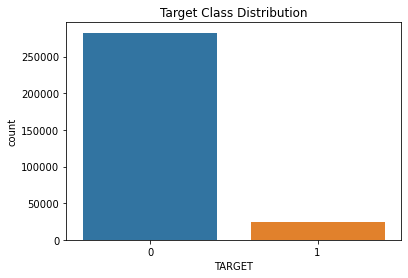

In [206]:
sns.countplot(train.TARGET)
plt.title("Target Class Distribution")

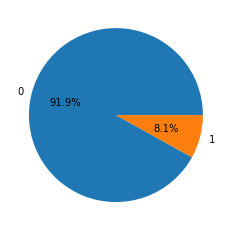

In [207]:
labels = ['0', '1']
plt.pie(train.TARGET.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

#Observation: The data is imbalanced (91.9%(Loan repayed-0) and 8.07%(Loan not repayed-1)) and we need to handle this problem.
As per the graph we can observe that most people have returned the money and only few people are there who are not able to return money

#### what is the solution for class imbalanced data..???

In [208]:
### Gender Column column:

Text(0.5, 1.0, 'Gender Class Distribution')

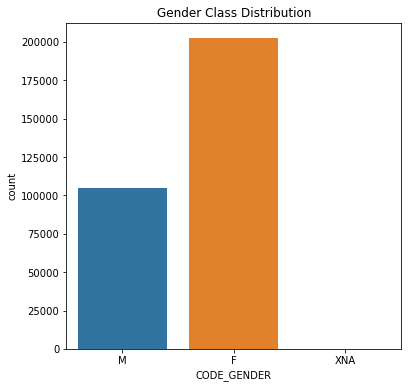

In [209]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x='CODE_GENDER',data=train)
plt.title("Gender Class Distribution")

In [210]:
train.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [211]:
#Observation: Females are higher in numner; almost double that of males.

### Amount Income Total:

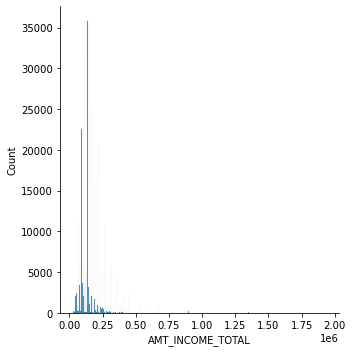

In [212]:
sns.displot(data= train[train.AMT_INCOME_TOTAL<2000000], x= 'AMT_INCOME_TOTAL')

In [213]:
#Observation:The distribution is right skewed and there are extreme values, we can apply log distribution.

In [214]:
### Amount Credit:

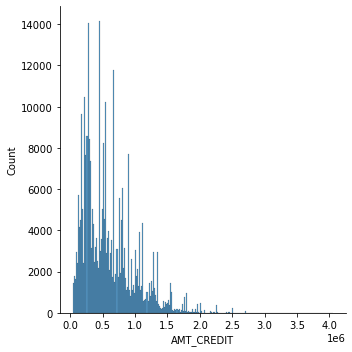

In [215]:
sns.displot(data= train, x= 'AMT_CREDIT')

In [216]:
#Observation: People who are taking credit for large amount are likely to take the loan.

### Types of Loans available:

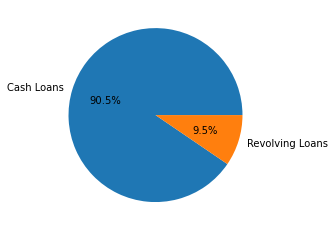

In [217]:
labels = ['Cash Loans', 'Revolving Loans']
plt.pie(train.NAME_CONTRACT_TYPE.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

In [218]:
#Observation: Many people are willing to take cash loan than revolving loan

In [219]:
## Miscellaneous Univariate Analysis

In [220]:
input_cols = list(train.columns)[0:-1]
target_col = 'TARGET'

In [221]:
numerical = train.select_dtypes(include=np.number).columns.tolist()
categorical = train.select_dtypes('object').columns.tolist()

NameError: name 'data' is not defined

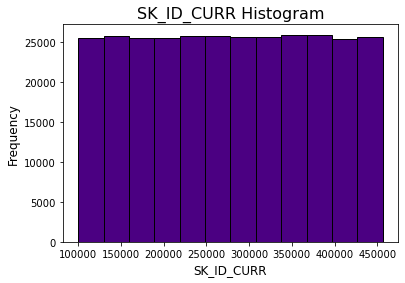

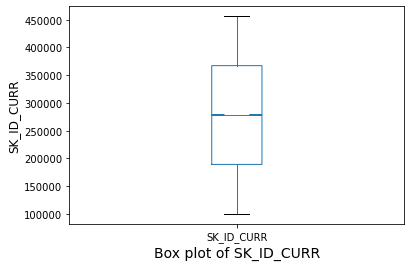

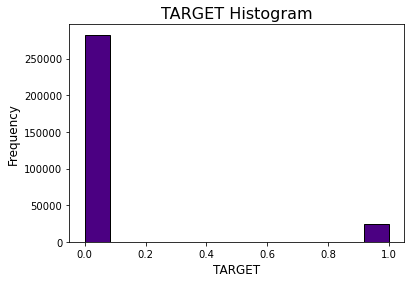

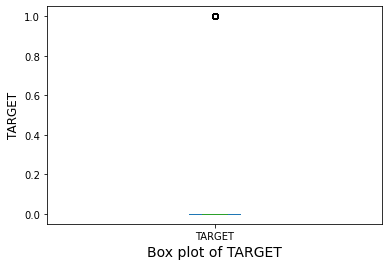

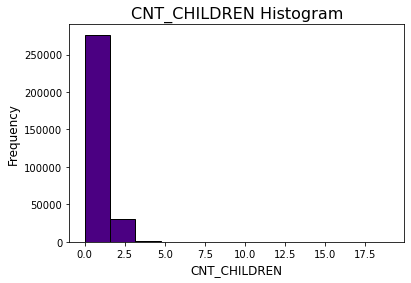

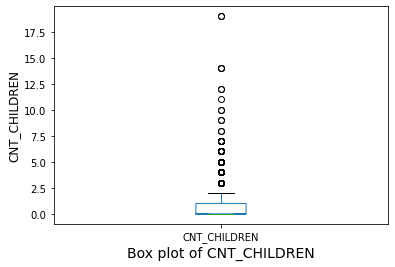

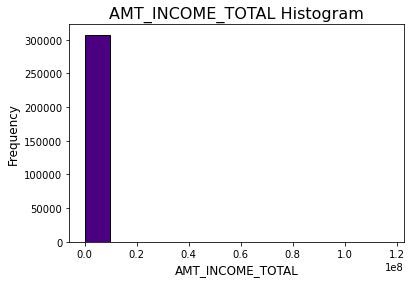

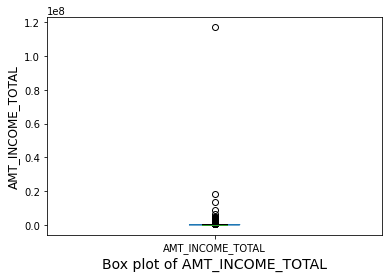

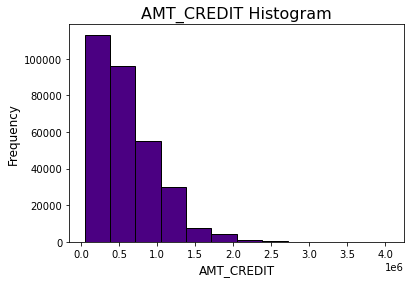

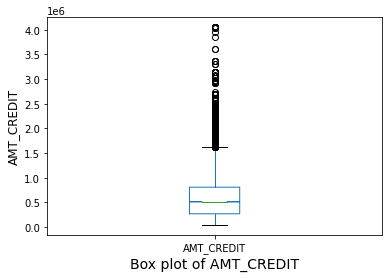

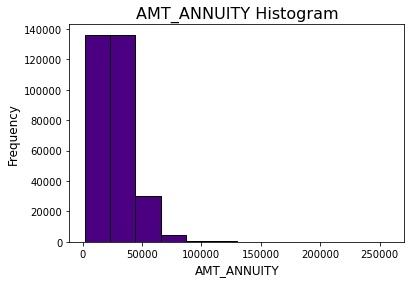

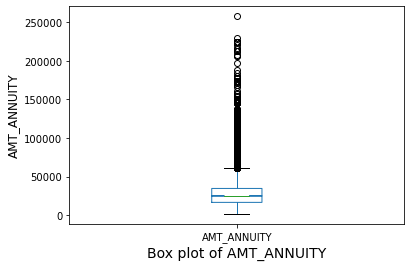

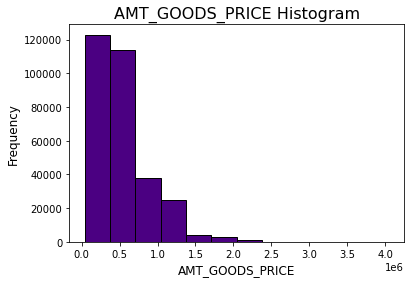

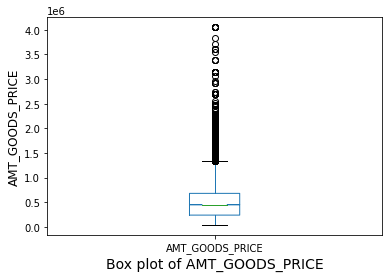

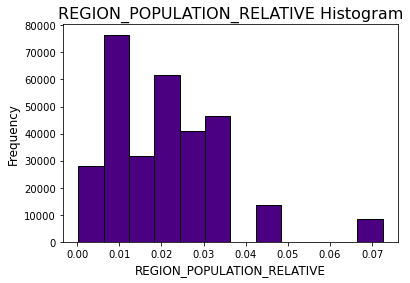

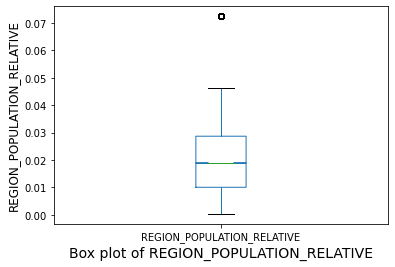

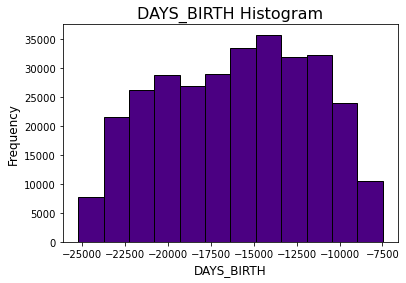

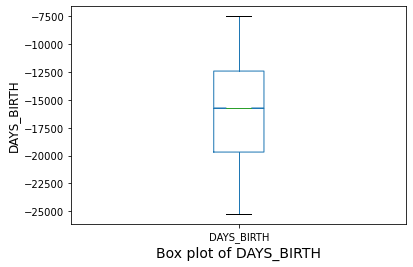

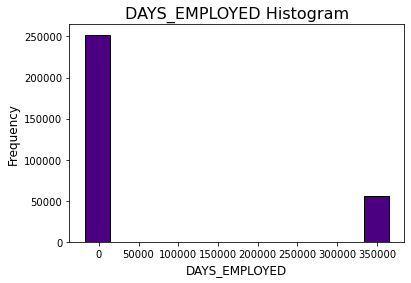

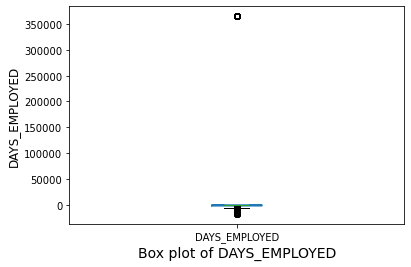

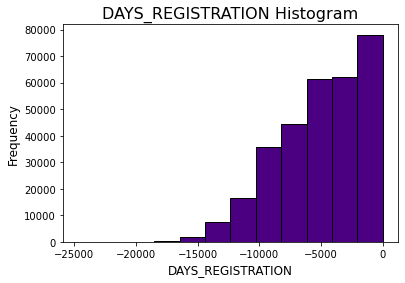

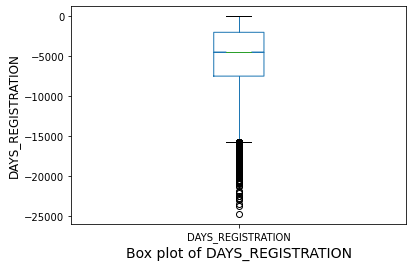

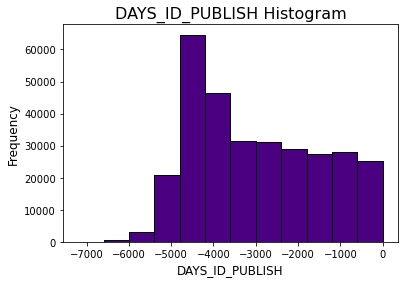

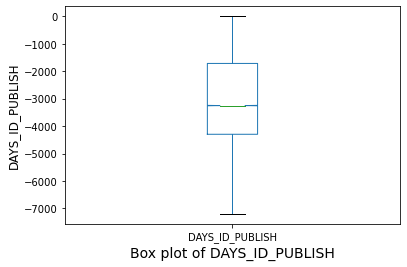

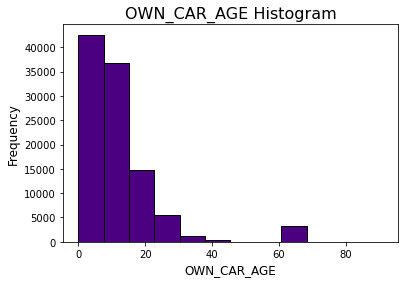

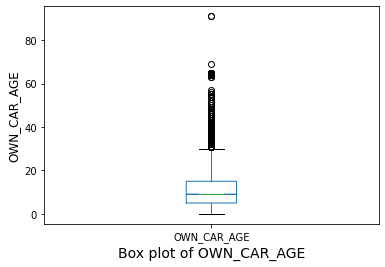

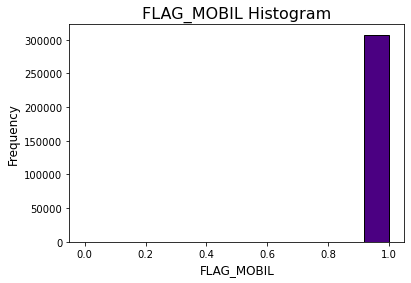

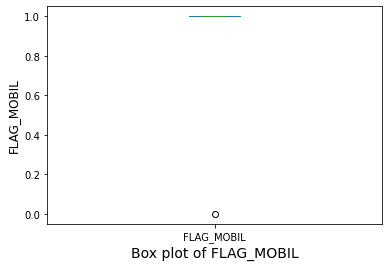

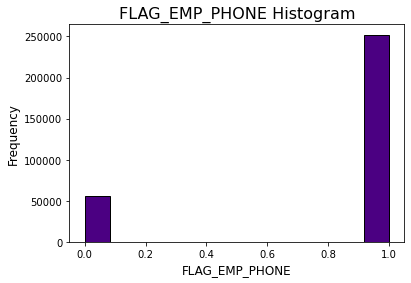

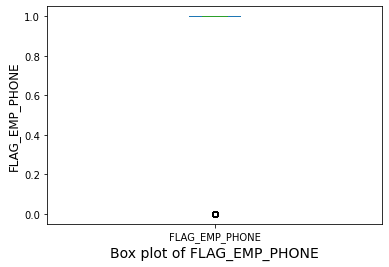

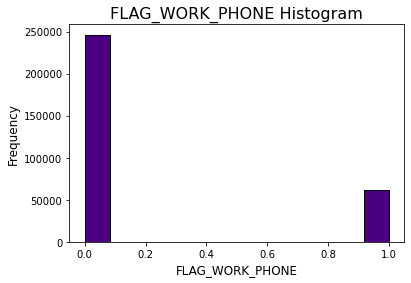

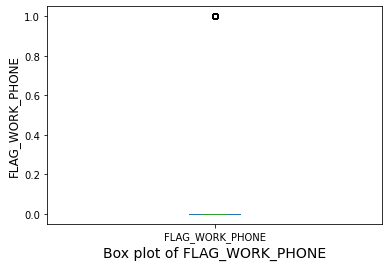

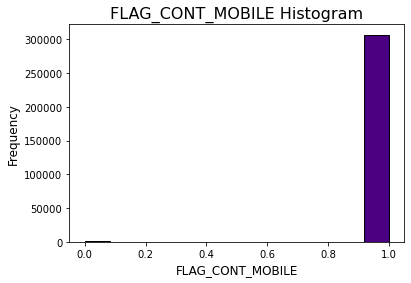

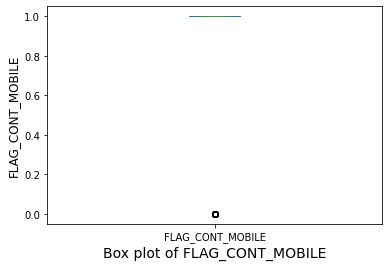

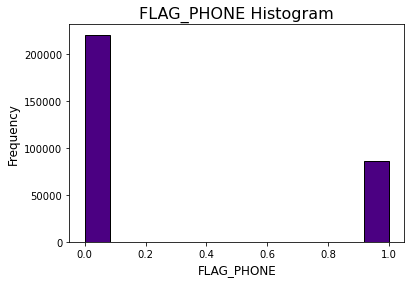

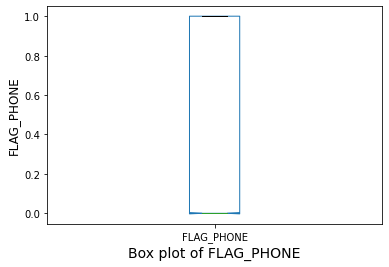

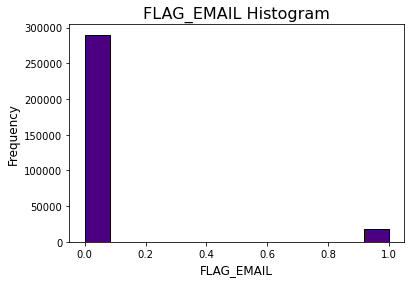

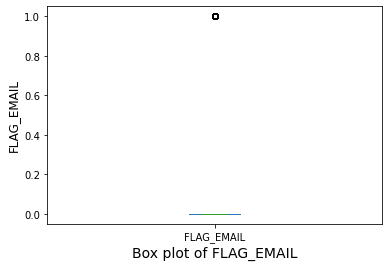

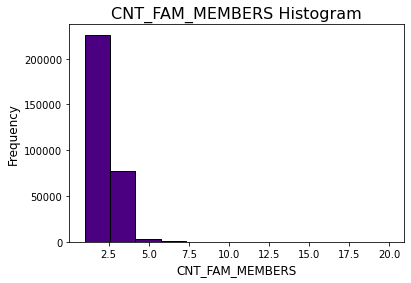

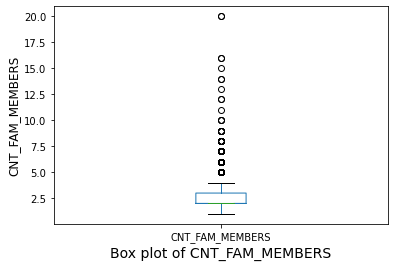

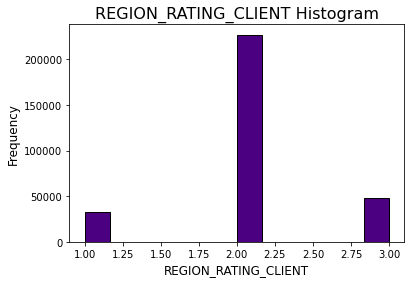

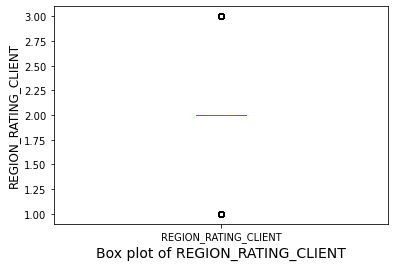

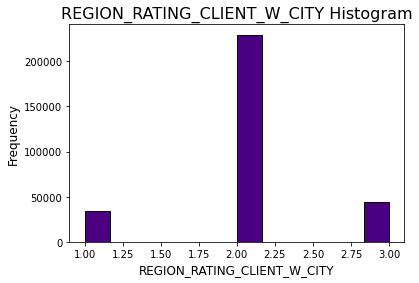

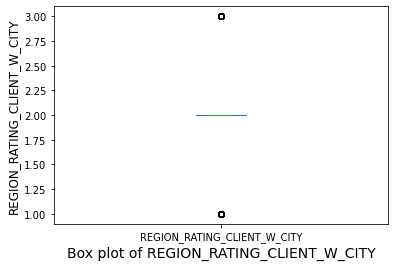

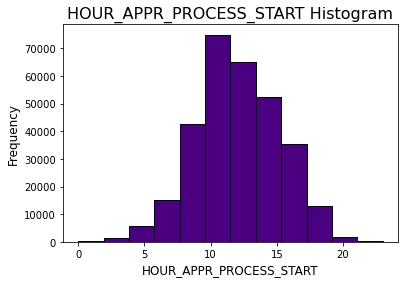

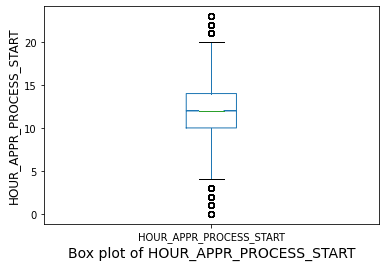

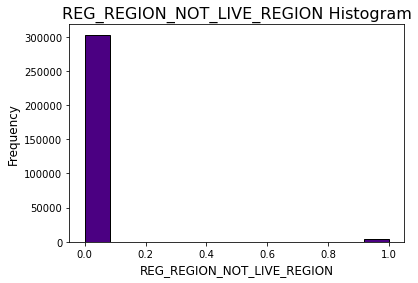

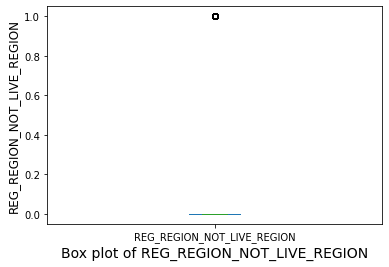

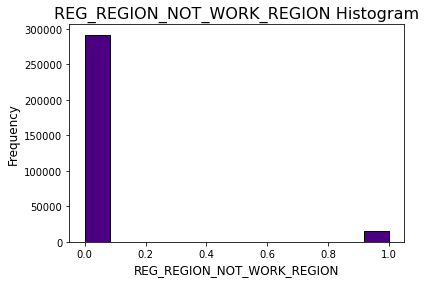

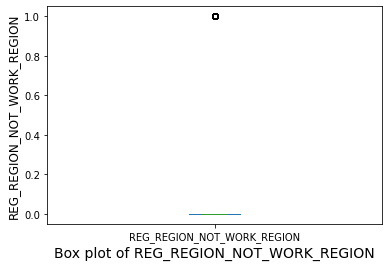

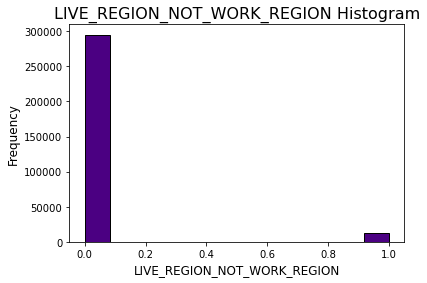

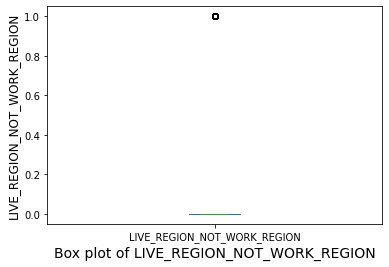

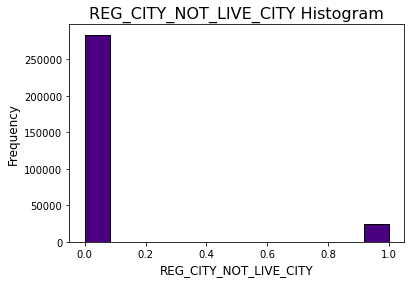

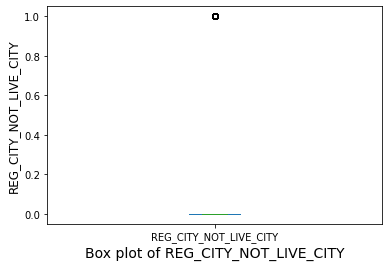

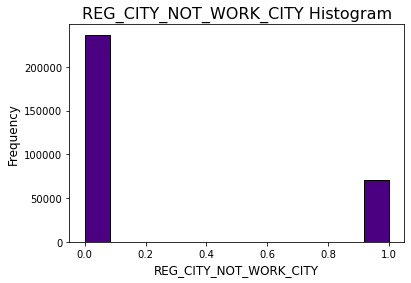

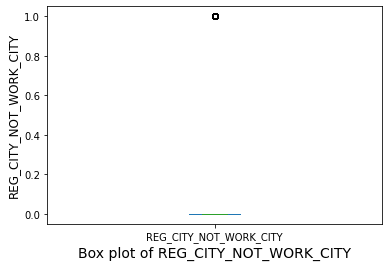

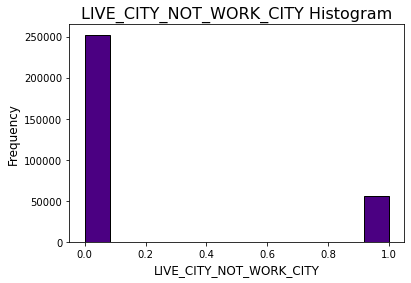

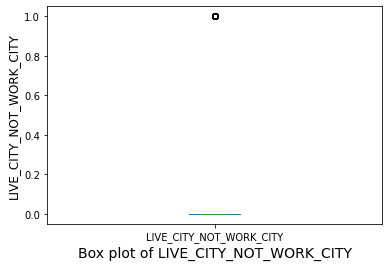

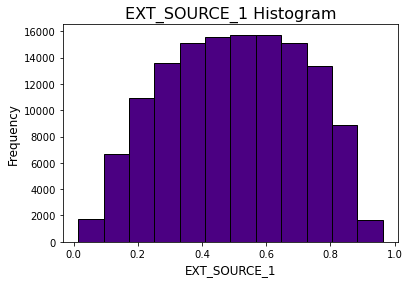

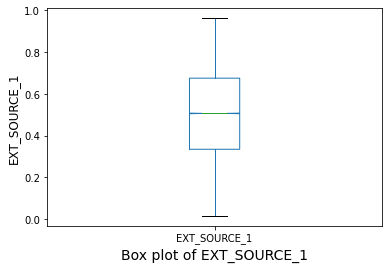

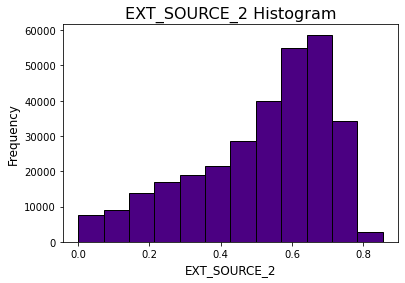

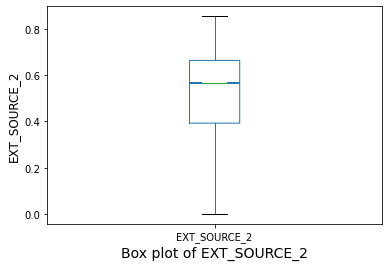

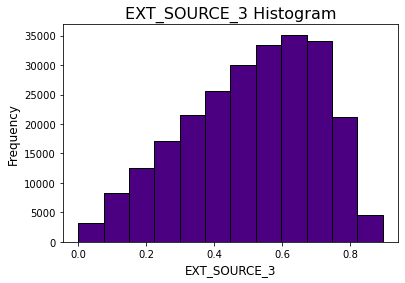

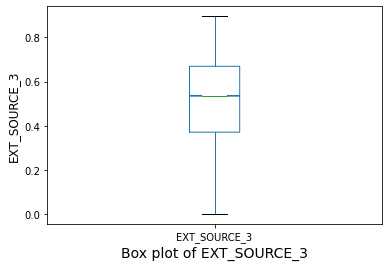

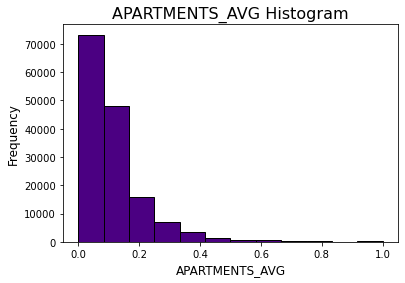

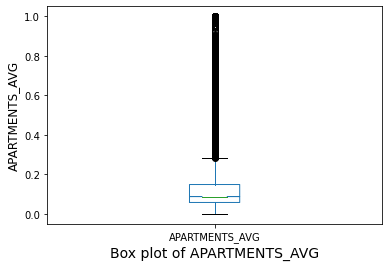

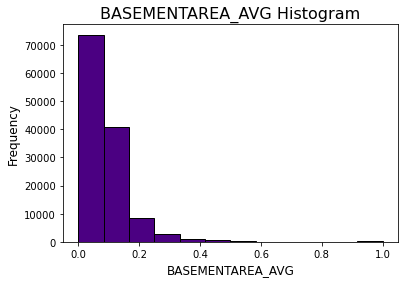

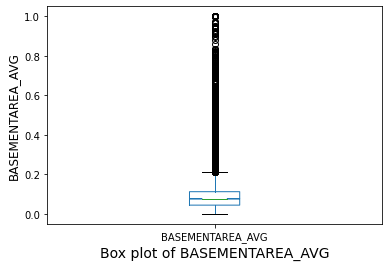

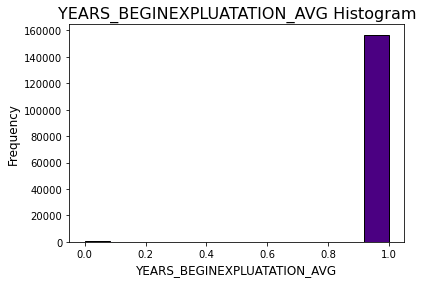

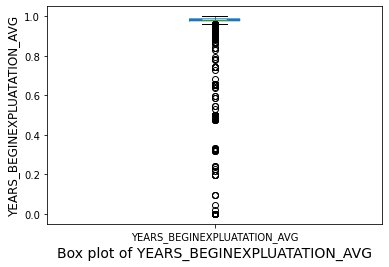

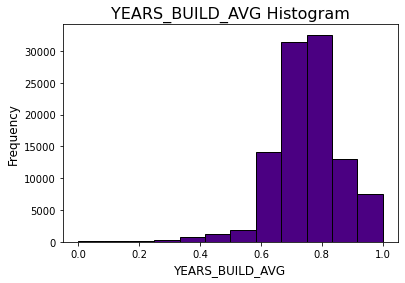

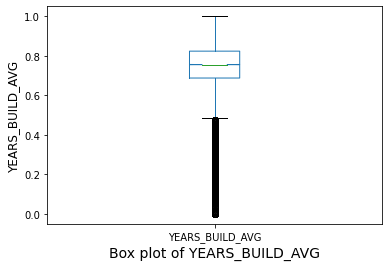

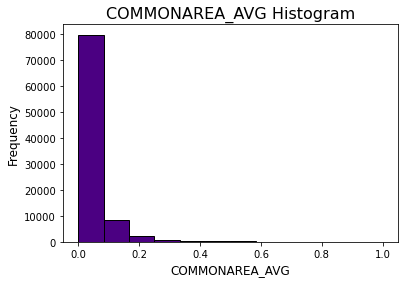

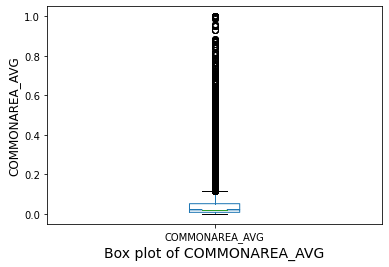

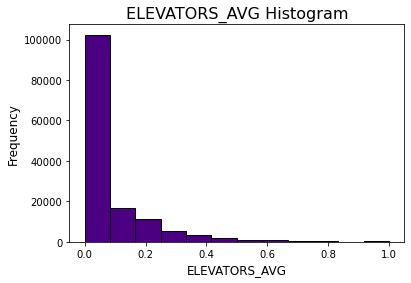

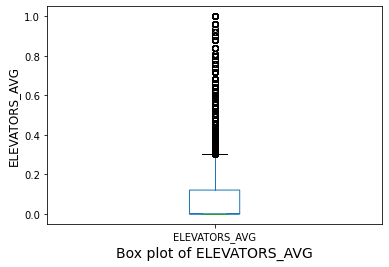

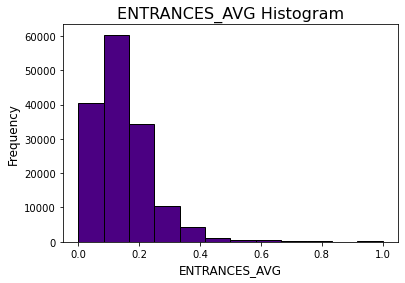

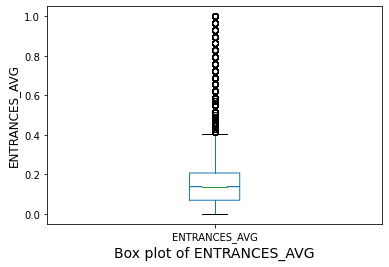

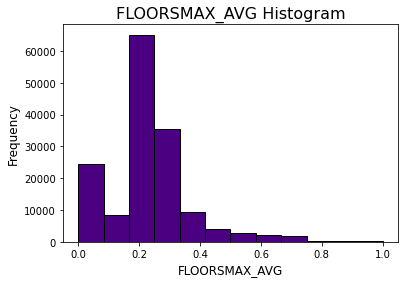

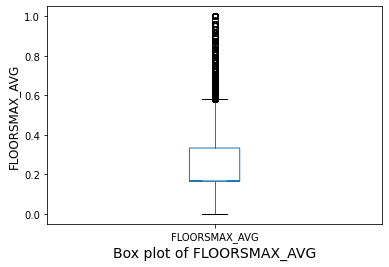

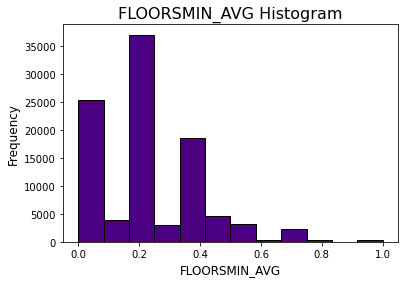

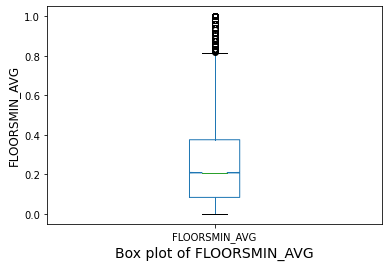

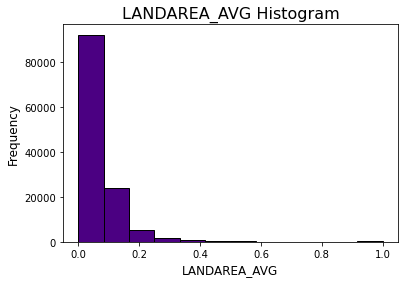

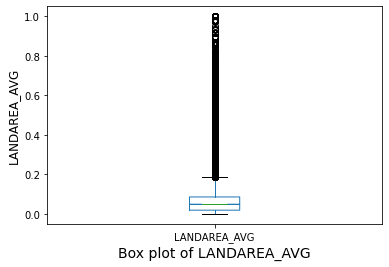

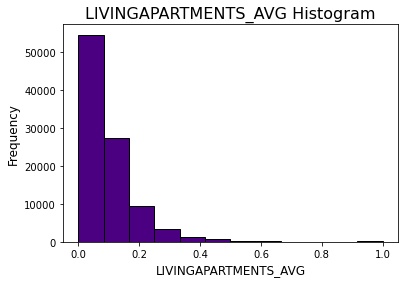

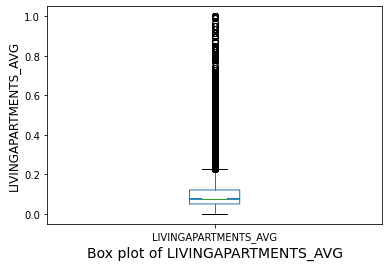

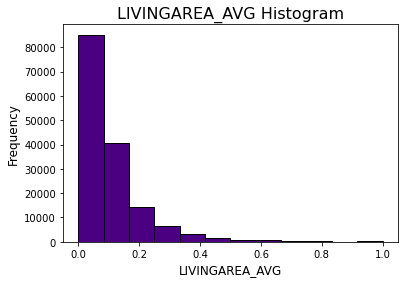

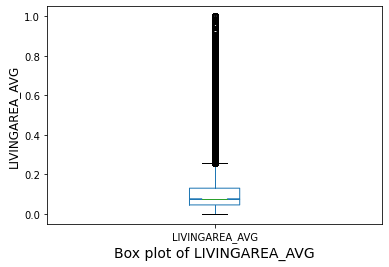

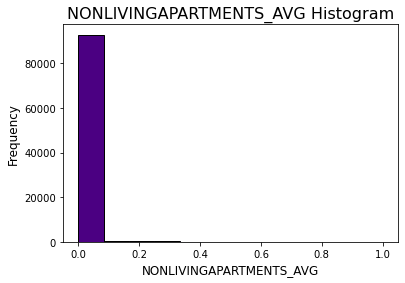

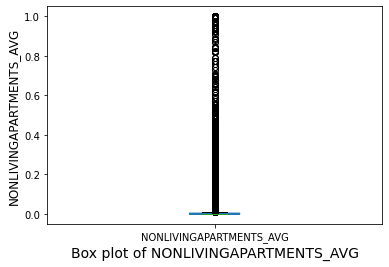

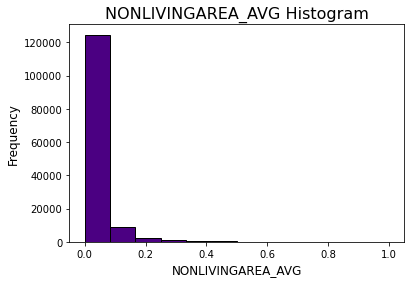

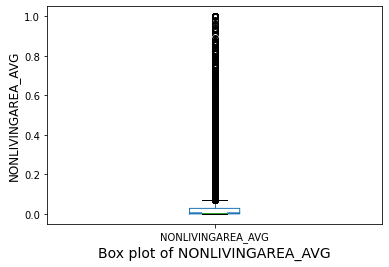

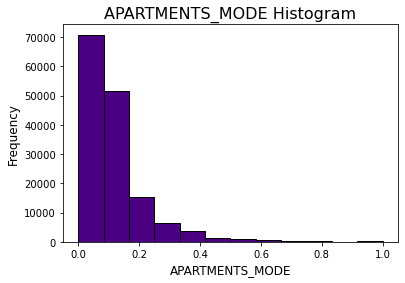

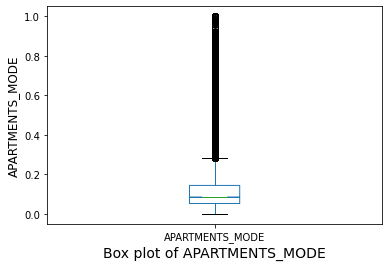

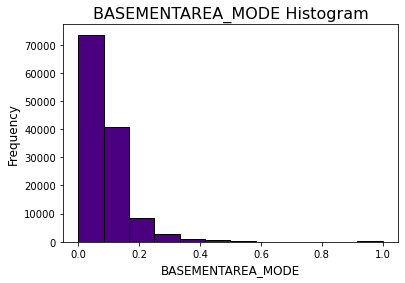

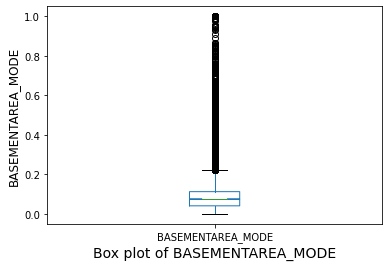

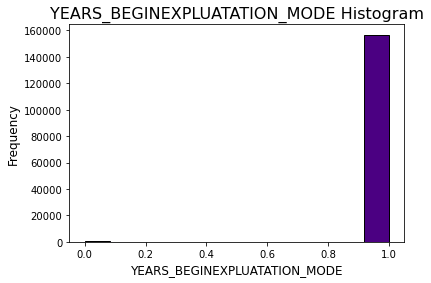

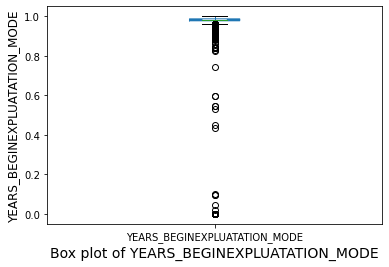

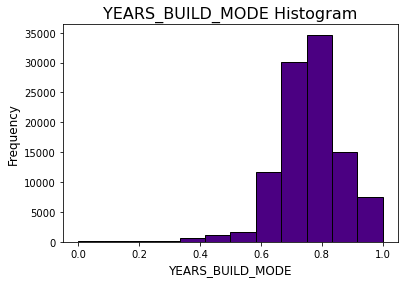

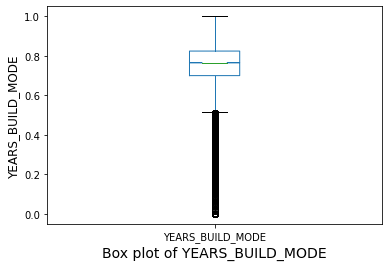

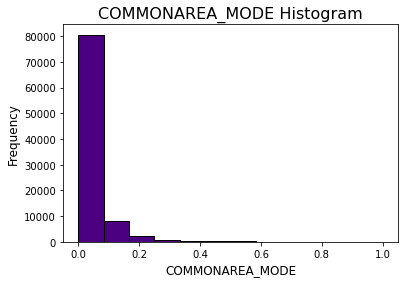

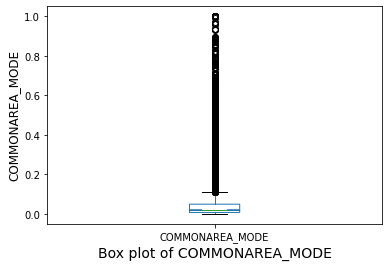

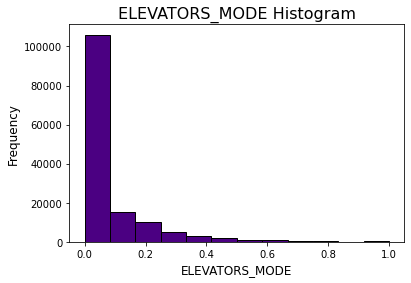

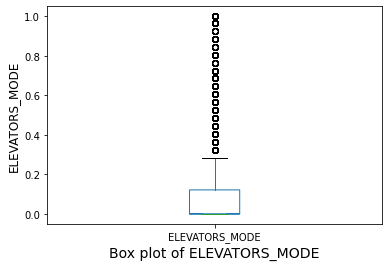

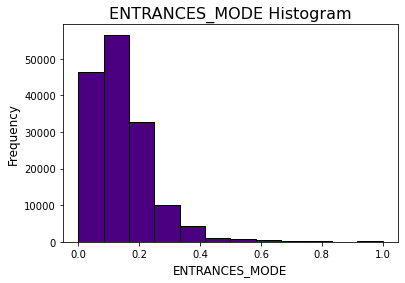

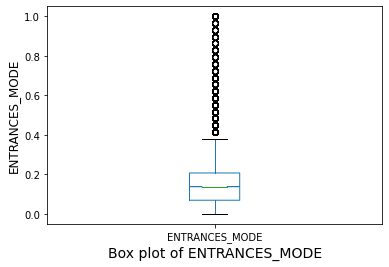

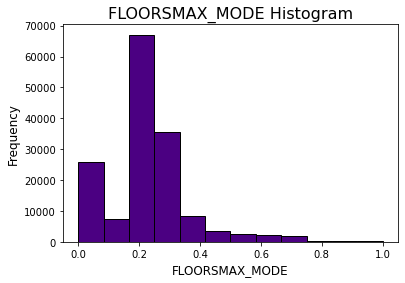

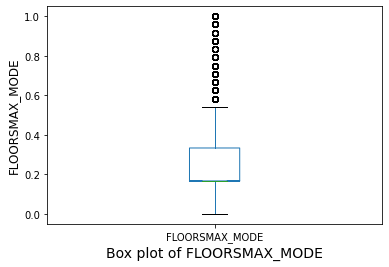

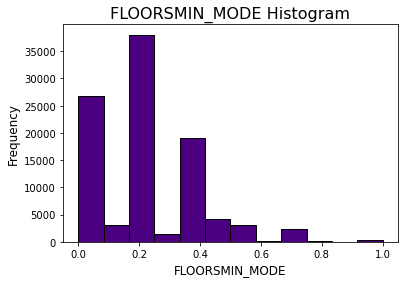

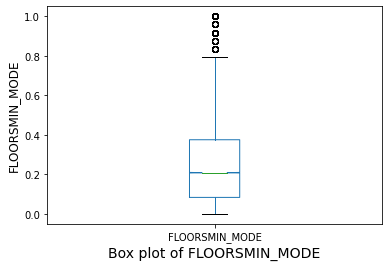

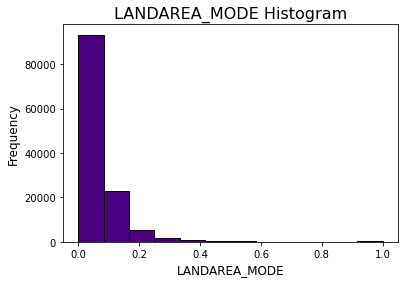

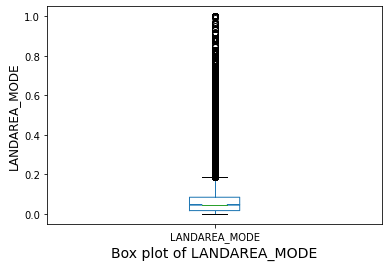

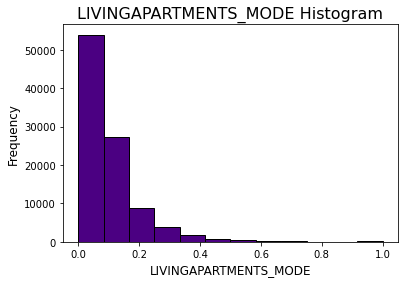

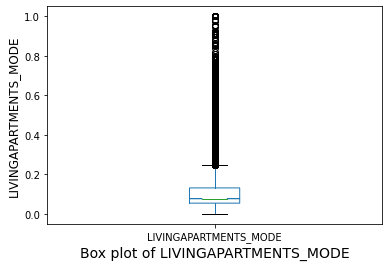

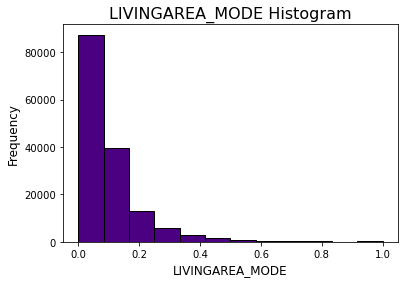

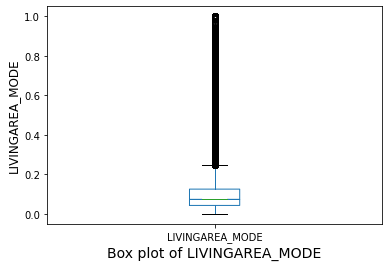

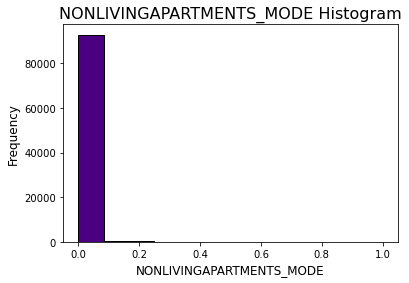

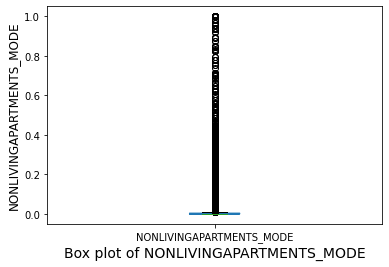

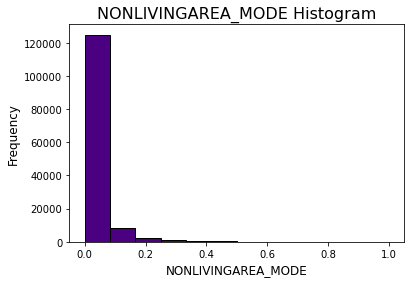

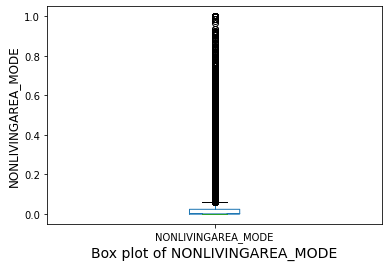

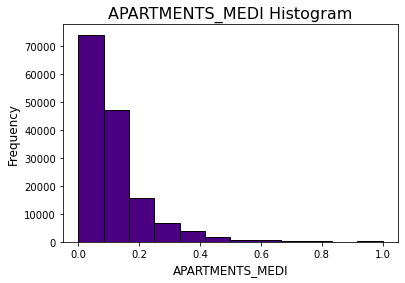

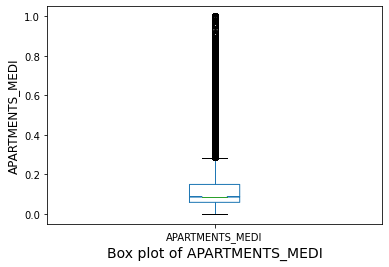

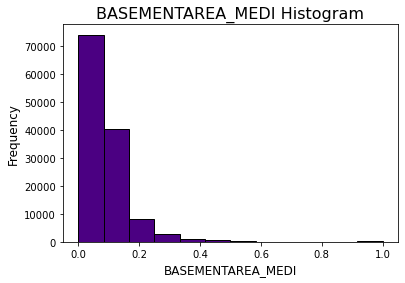

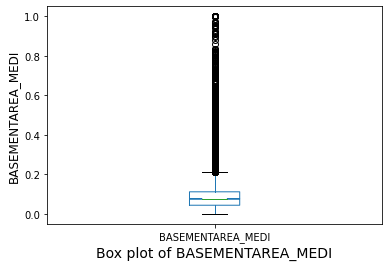

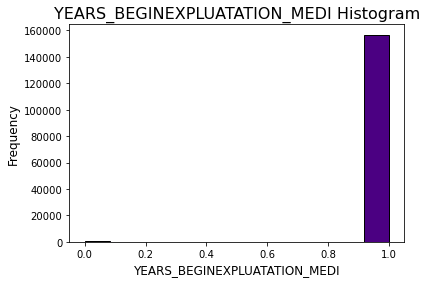

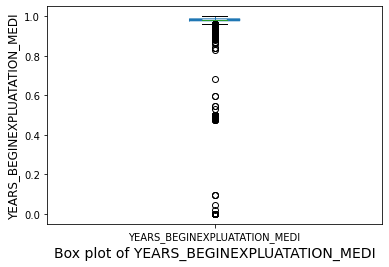

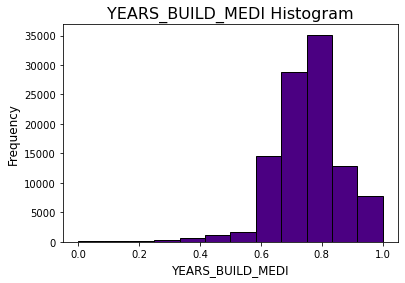

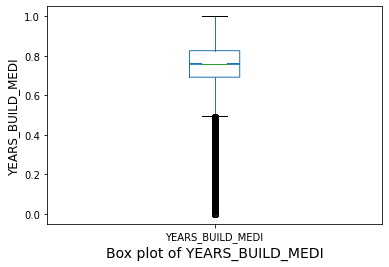

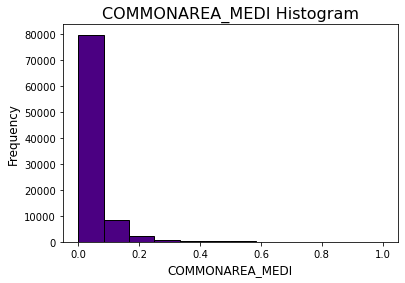

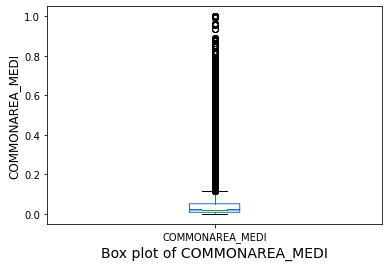

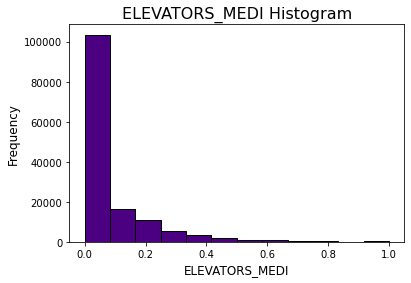

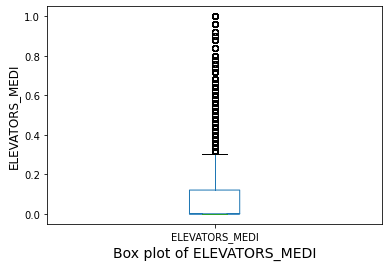

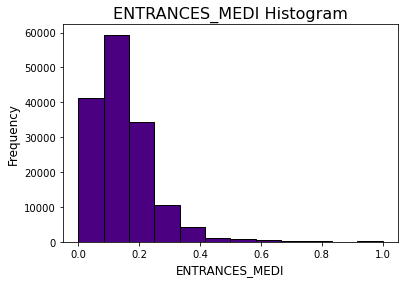

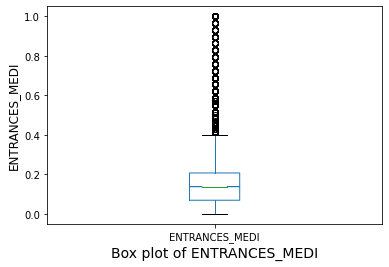

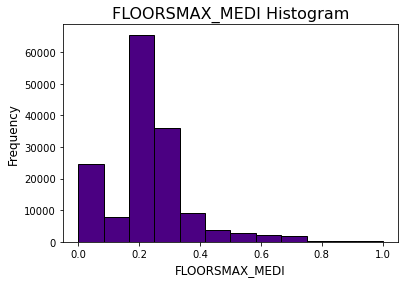

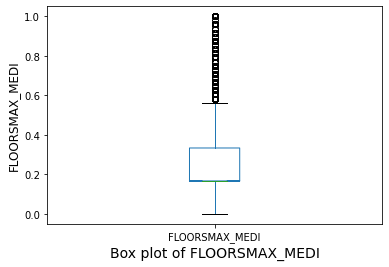

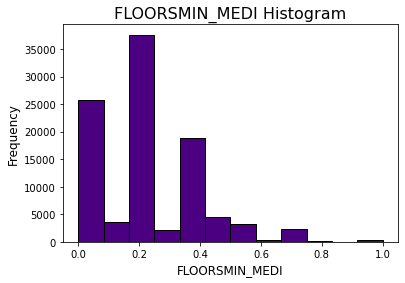

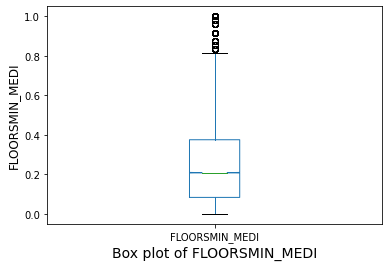

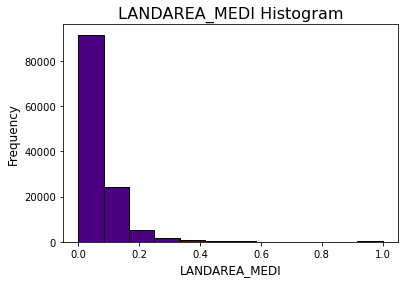

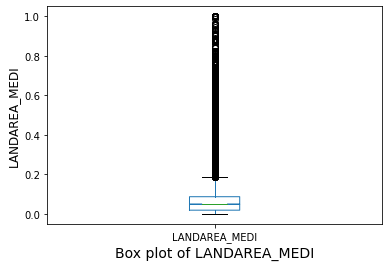

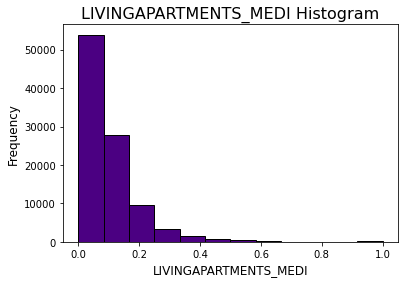

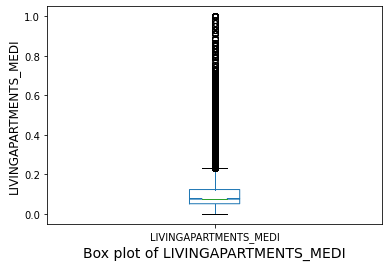

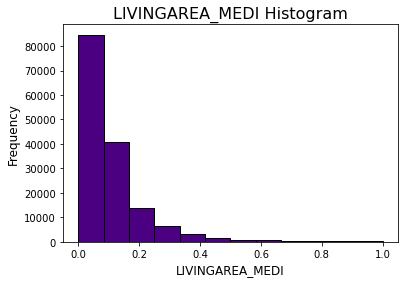

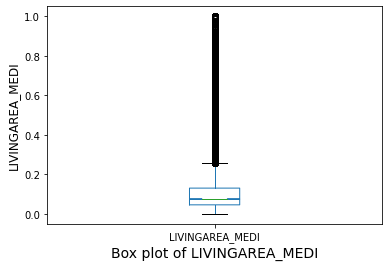

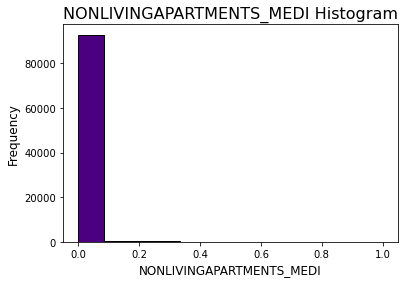

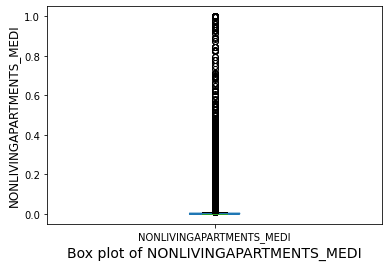

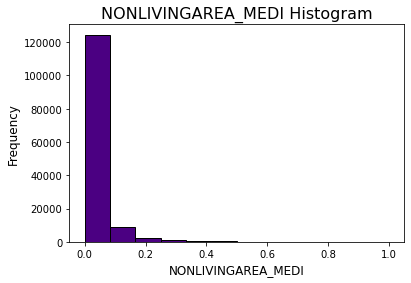

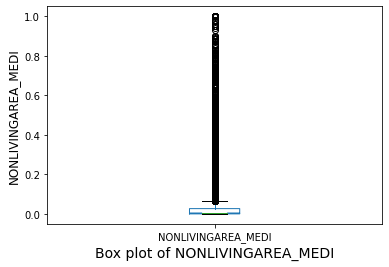

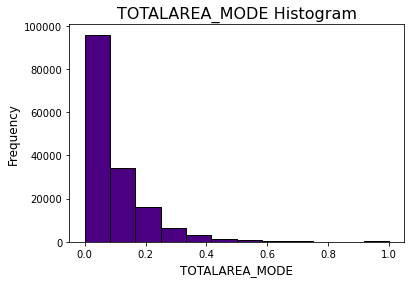

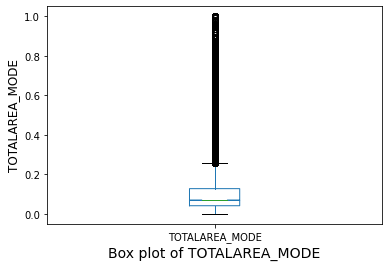

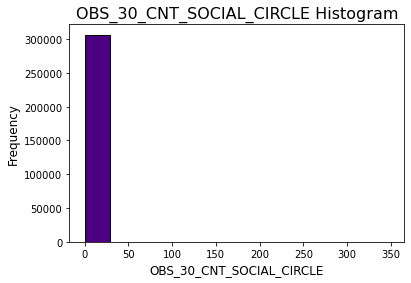

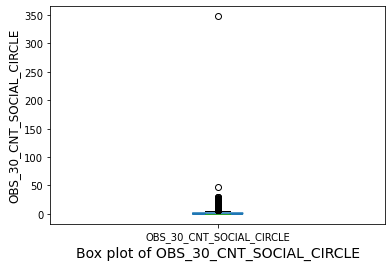

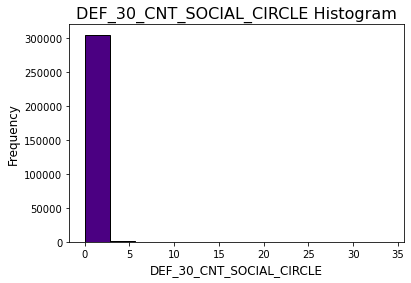

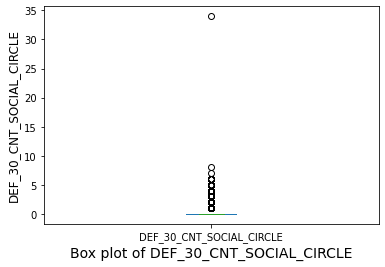

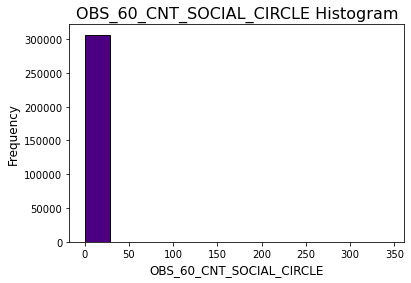

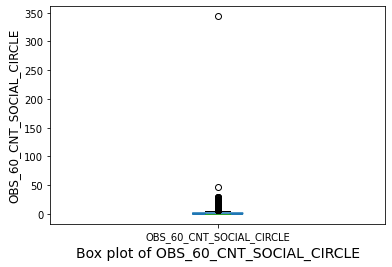

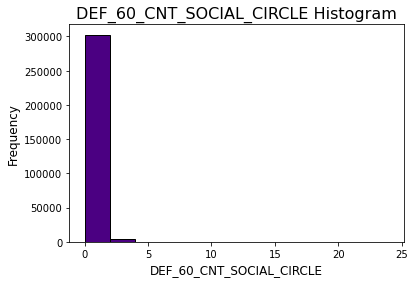

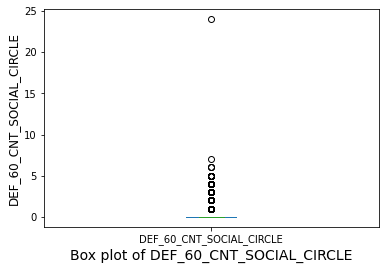

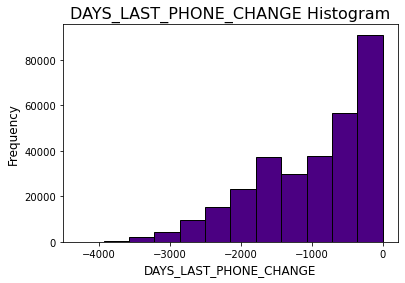

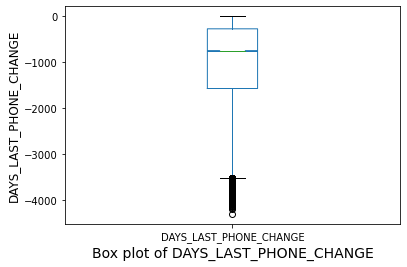

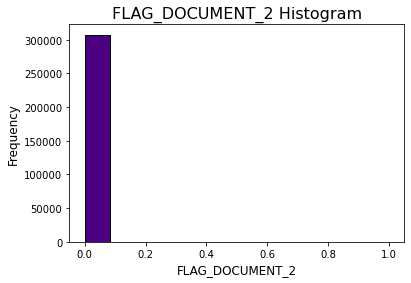

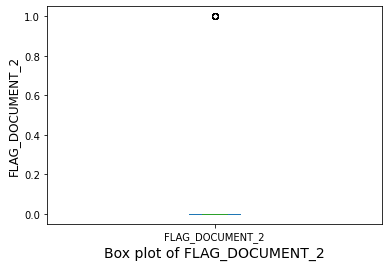

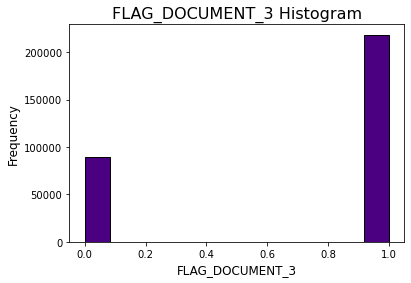

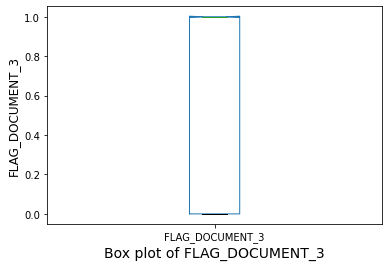

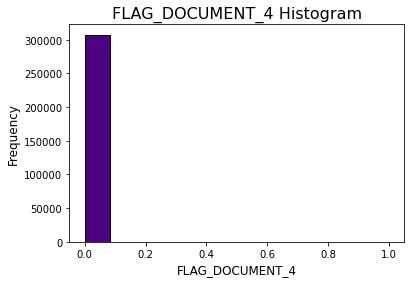

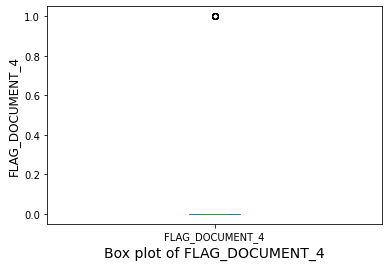

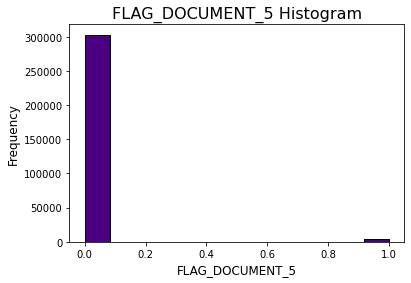

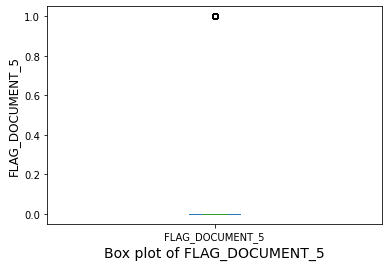

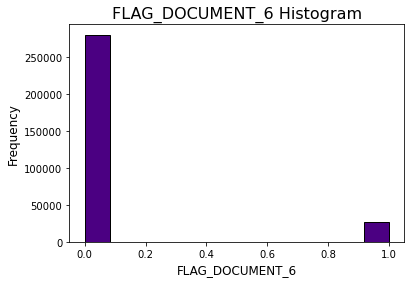

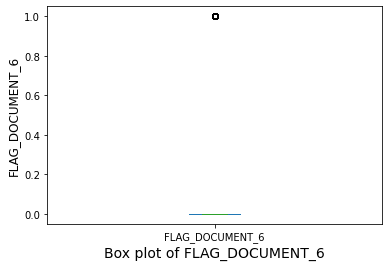

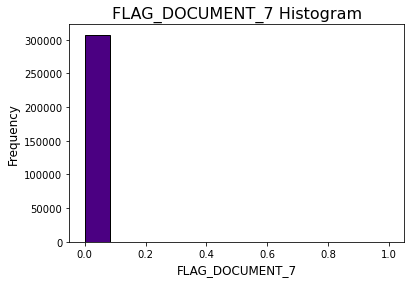

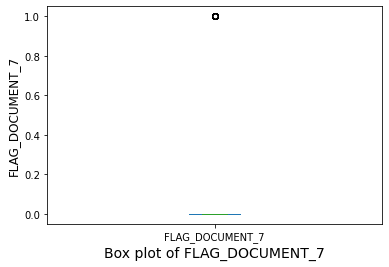

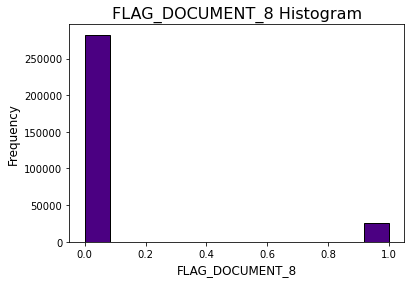

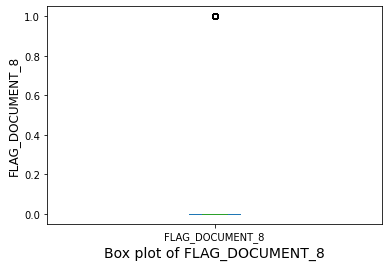

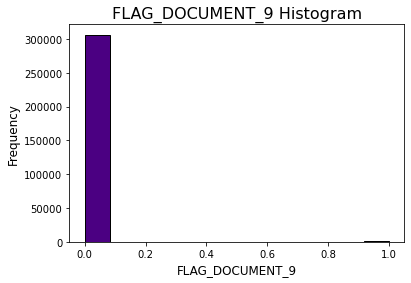

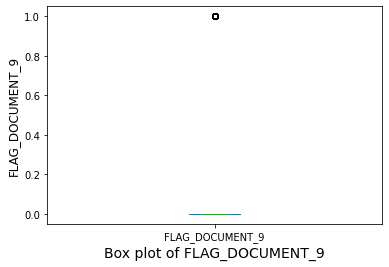

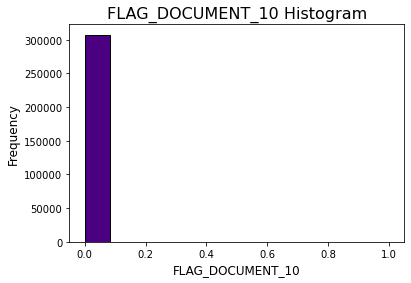

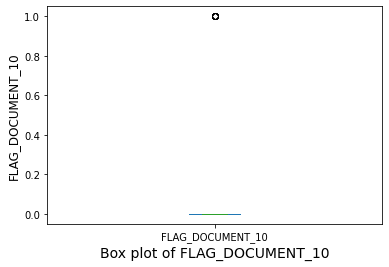

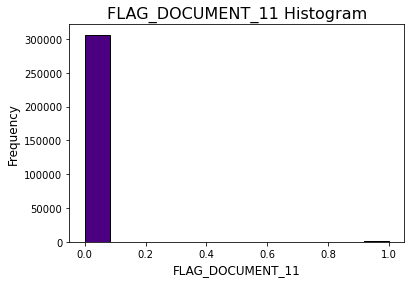

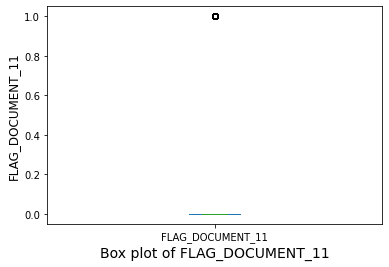

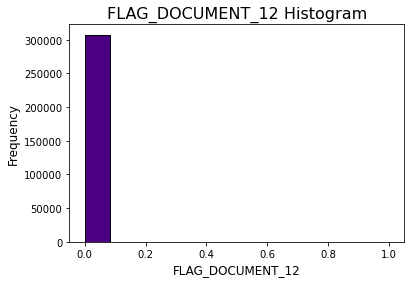

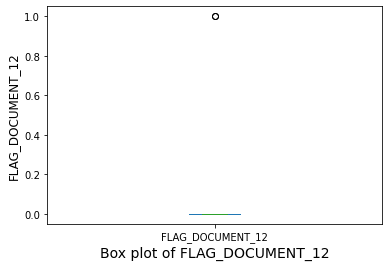

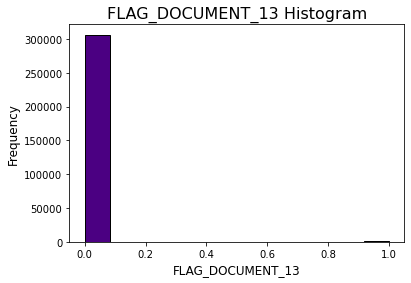

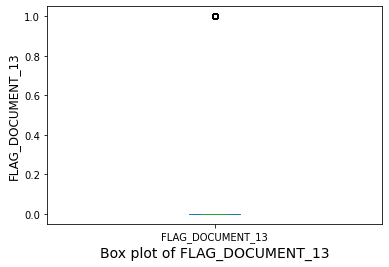

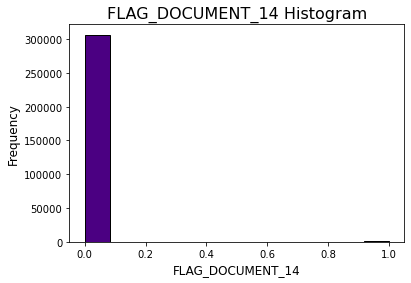

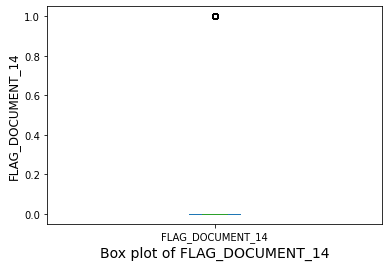

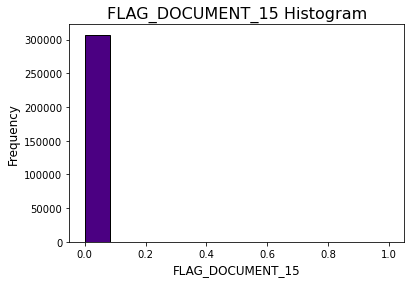

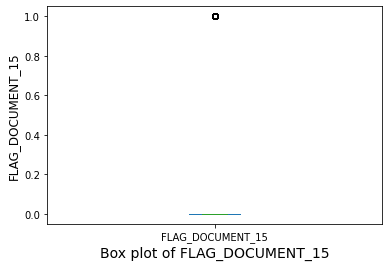

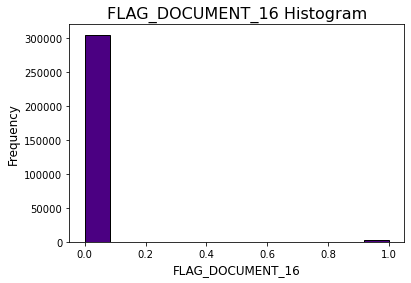

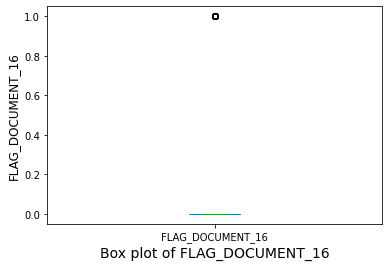

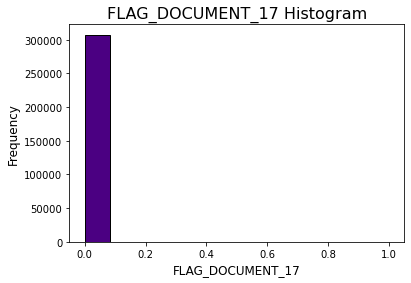

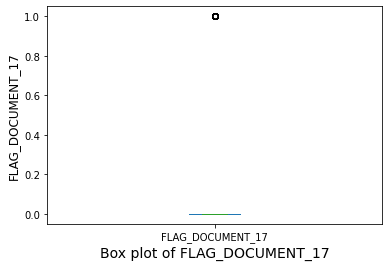

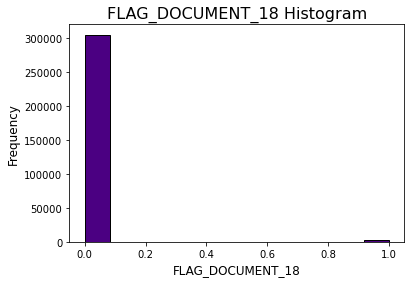

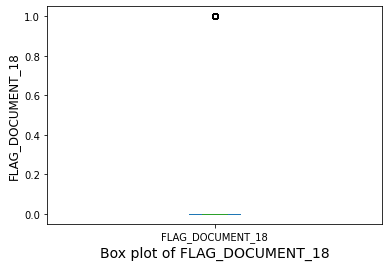

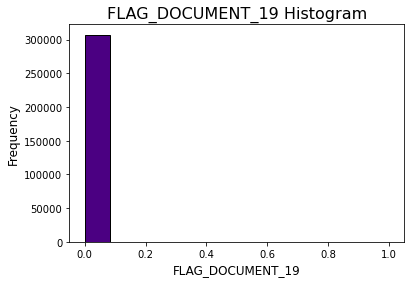

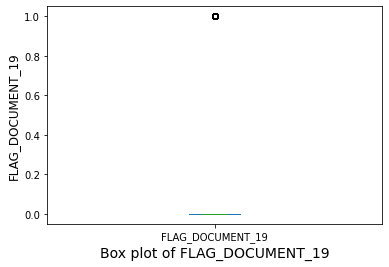

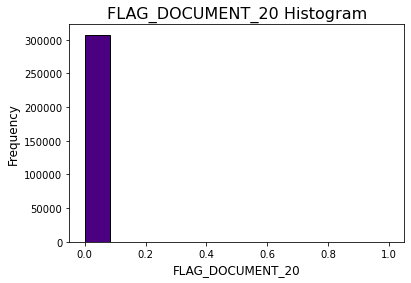

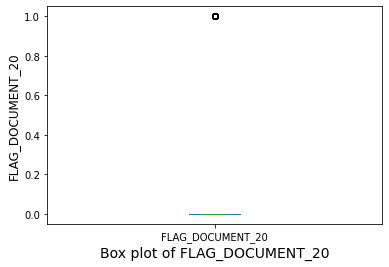

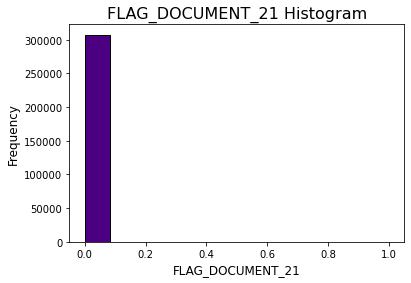

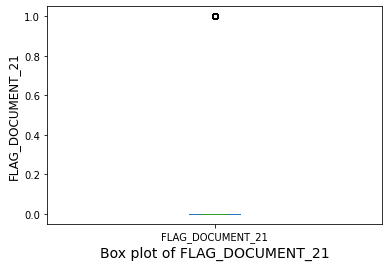

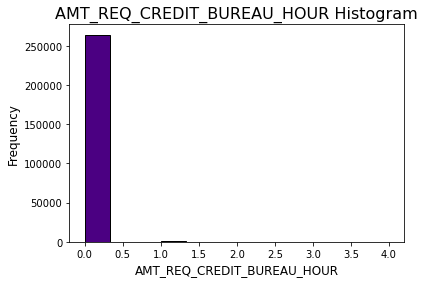

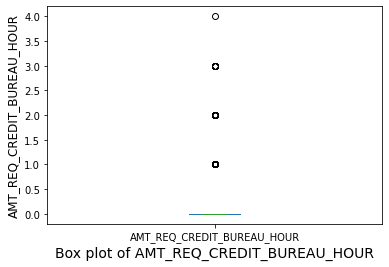

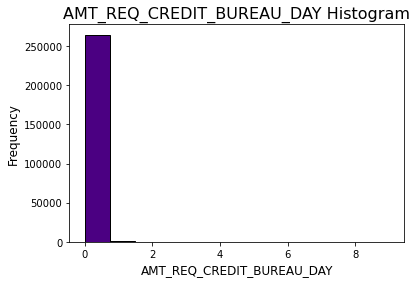

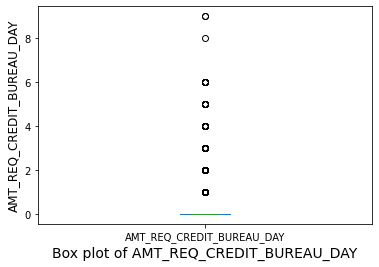

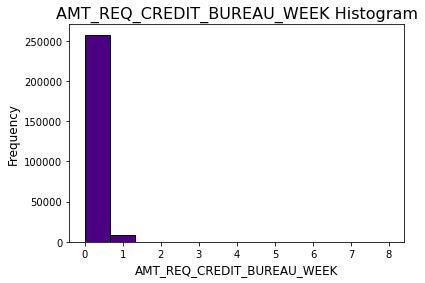

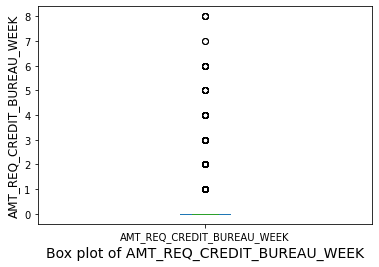

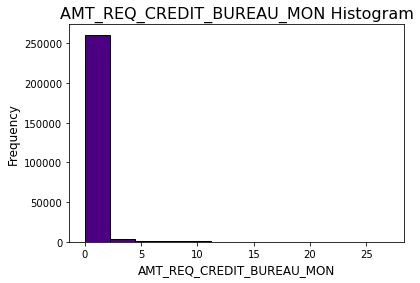

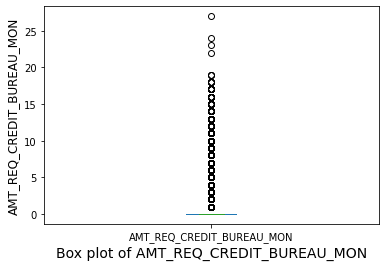

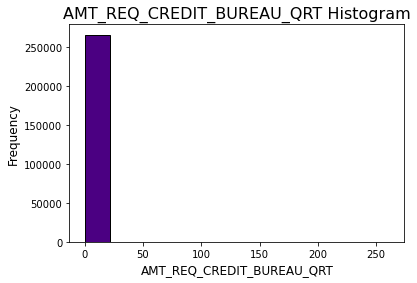

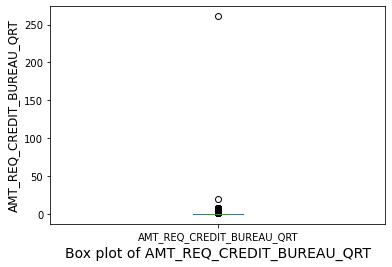

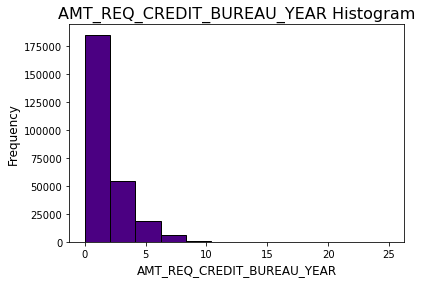

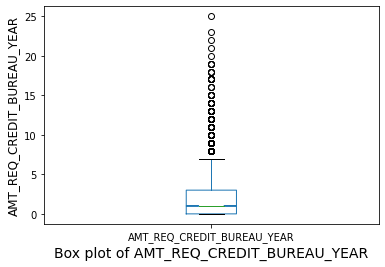

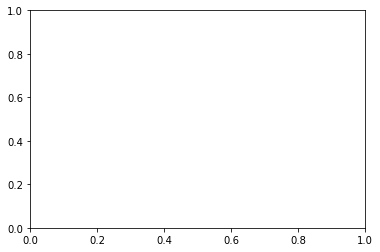

In [223]:
#Univariate Analysis
for feature in numerical:
        
        #Creating Histograms for numerical and continuous columns
        train.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency",fontsize=12) #Title of y-axis
        plt.title(feature +" Histogram",fontsize=16)  #Title of histogram
               
        
        #Creating Boxplots for numerical and continuous columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        train.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns  

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
       
        
    #Creating Barplots for categorical and discrete features
for feature in categorical:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        data[feature].value_counts().plot(kind='bar', figsize=(8,6), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
       

In [ ]:
#From this, we can make exhaustive observations according to the need of the business problem.

### Bivariate Analysis

In [ ]:
### Income Sources of Applicants:

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

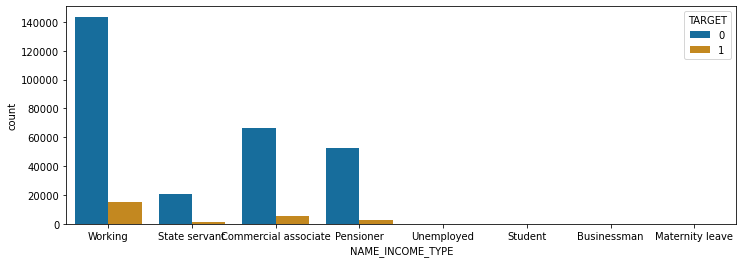

In [226]:
plt.subplots (figsize=(12,4))
sns.countplot (x='NAME_INCOME_TYPE',  hue='TARGET', data= train, palette = 'colorblind')

#Observation: Working Progessionals, State servants, Commercial associates and Pensioners have sizeable amount of unpaid loans.

In [227]:
## Education Type:

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

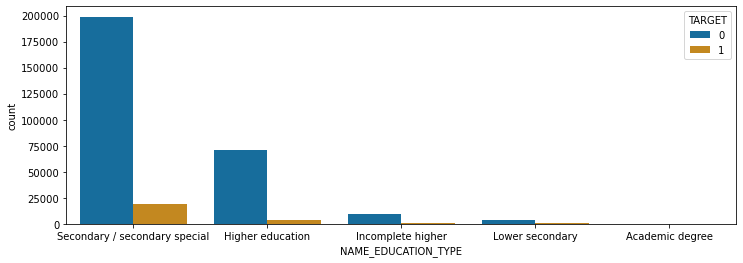

In [228]:
plt.subplots (figsize=(12,4))
sns.countplot (x='NAME_EDUCATION_TYPE',  hue='TARGET', data= train, palette = 'colorblind')

People with Secondary education and Higher education have the highest amount of unpaid loans.

In [229]:
## Gender Loan Status

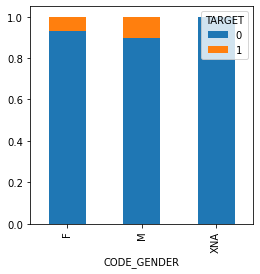

In [230]:
Gender=pd.crosstab(train['CODE_GENDER'],train['TARGET'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [231]:
#Observation: Among the people who have applied for loans, males defaulted more.

In [232]:
# Housing type of Applicants 

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

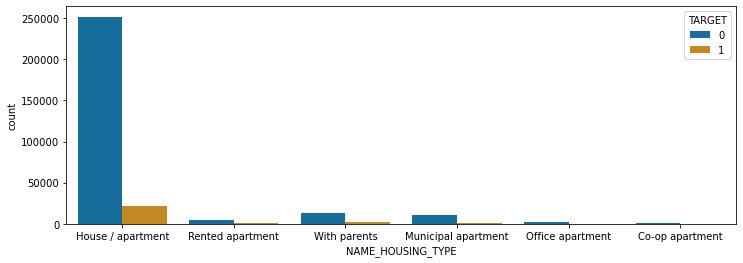

In [233]:
plt.subplots (figsize=(12,4))
sns.countplot (x='NAME_HOUSING_TYPE',  hue='TARGET', data= train, palette = 'colorblind')

#Observation: People with House/apartment have higher proportion of property purchase by loan. Hence, they are defaulting the loan most.

## 3. Data Preparation and Merging:

In [234]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

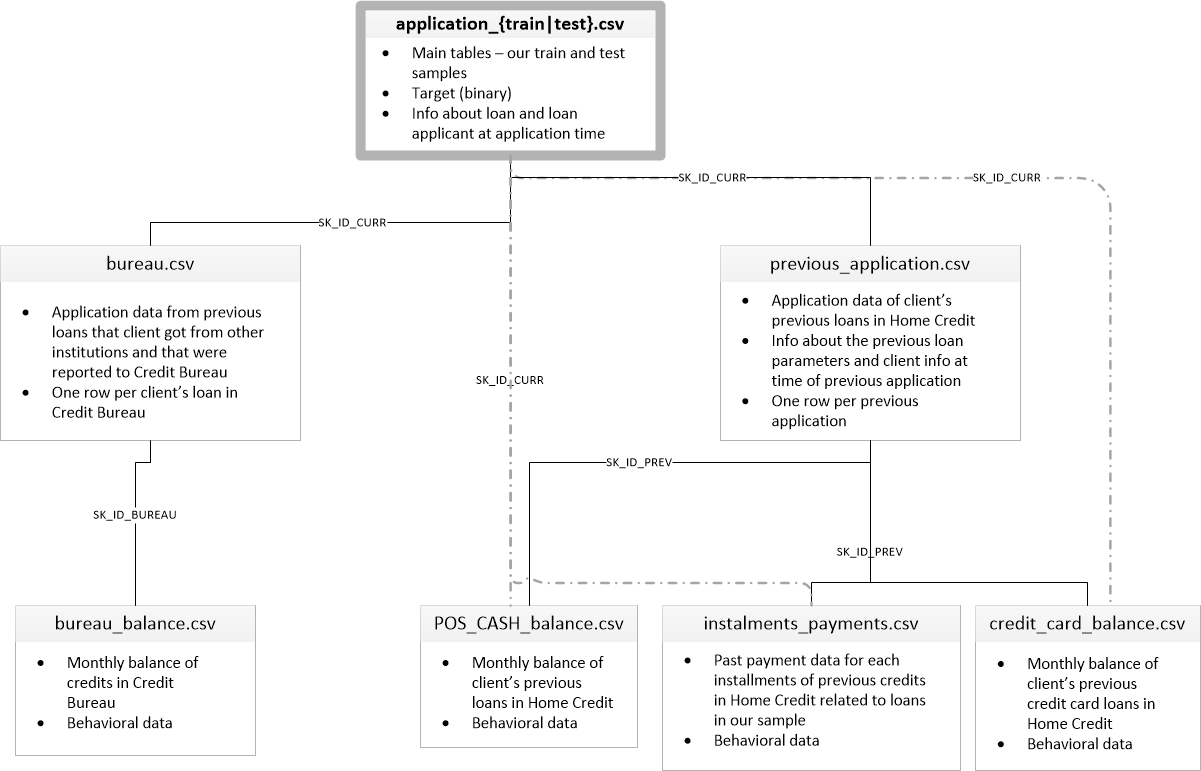

In [236]:
#importing the previous application file

previous_application = pd.read_csv('previous_application.csv')


In [237]:
# dropping the column SK_ID_PREV

previous_application.drop('SK_ID_PREV', axis=1, inplace= True)

In [238]:
# Groupby the rows on SK_ID_CURR and taking the aggregate mean of the variables

previous_application = previous_application.groupby('SK_ID_CURR').mean().reset_index()

In [239]:
# MERGING TRAINING DATA WITH PREVIOUS APPLICATION

train1 = train.merge(previous_application, on='SK_ID_CURR',  how = 'left')

In [241]:
train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000


In [242]:
#importing the POS cash balance

POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')

In [243]:
# Groupby the rows on SK_ID_CURR and taking the aggregate mean of the variables
# dropping the column SK_ID_PREV

POS_CASH_balance = POS_CASH_balance.groupby('SK_ID_CURR').mean().reset_index()
POS_CASH_balance.drop('SK_ID_PREV' ,axis=1 , inplace= True)

In [244]:
POS_CASH_balance

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,100001,-72.555556,4.000000,1.444444,0.777778,0.777778
1,100002,-10.000000,24.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,10.107143,5.785714,0.000000,0.000000
3,100004,-25.500000,3.750000,2.250000,0.000000,0.000000
4,100005,-20.000000,11.700000,7.200000,0.000000,0.000000
...,...,...,...,...,...,...
337247,456251,-5.000000,7.875000,4.375000,0.000000,0.000000
337248,456252,-79.000000,6.000000,3.000000,0.000000,0.000000
337249,456253,-79.235294,6.705882,2.000000,0.294118,0.294118
337250,456254,-5.550000,14.900000,10.350000,0.000000,0.000000


In [245]:
# Meraging the train1 with POS cash balance

train1 = train1.merge(POS_CASH_balance, on = 'SK_ID_CURR',  how = 'left')

In [246]:
train1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-565.000000,125.000000,-25.000000,-17.000000,0.000000,-10.000000,24.000000,15.000000,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667,-43.785714,10.107143,5.785714,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-784.000000,-694.000000,-724.000000,-714.000000,0.000000,-25.500000,3.750000,2.250000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,91066.500000,91584.000000,182477.500000,182481.750000,0.000000,-9.619048,12.000000,8.650000,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000,-33.636364,15.333333,8.969697,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-210.000000,0.000000,-30.000000,-25.000000,0.000000,-5.000000,7.875000,4.375000,0.000000,0.000000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000,-79.000000,6.000000,3.000000,0.000000,0.000000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000,-79.235294,6.705882,2.000000,0.294118,0.294118
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-269.000000,151.000000,365243.000000,365243.000000,0.500000,-5.550000,14.900000,10.350000,0.000000,0.000000


In [247]:
#importing the installment payments

installments_payments = pd.read_csv('installments_payments.csv')

In [248]:
# Groupby the rows on SK_ID_CURR and taking the aggregate mean of the variables
# dropping the column SK_ID_PREV

installments_payments = installments_payments.groupby('SK_ID_CURR').mean().reset_index()
installments_payments.drop('SK_ID_PREV' ,axis=1 , inplace= True)

In [249]:
installments_payments

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...,...
339582,456251,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
339583,456252,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
339584,456253,1.000000,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357
339585,456254,1.000000,5.263158,-142.263158,-161.263158,10239.832895,10239.832895


In [250]:
# Merging the train1 with installment payments

train1 = train1.merge(installments_payments, on = 'SK_ID_CURR',  how = 'left')

In [253]:
train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.000000,15.000000,0.0,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,10.107143,5.785714,0.0,0.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,3.750000,2.250000,0.0,0.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,12.000000,8.650000,0.0,0.0,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,15.333333,8.969697,0.0,0.0,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227


In [254]:
# importing the credit card balance file

credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [255]:
# Groupby the rows on SK_ID_CURR and taking the aggregate mean of the variables
# dropping the column SK_ID_PREV

credit_card_balance = credit_card_balance.groupby('SK_ID_CURR').mean().reset_index()
credit_card_balance.drop('SK_ID_PREV' ,axis=1 , inplace= True)

In [256]:
credit_card_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100006,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1,100011,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.0,3956.221849,4843.064189,...,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.0,25.767123,0.000000,0.000000
2,100013,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.0,1454.539551,7168.346250,...,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.0,18.719101,0.010417,0.010417
3,100021,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
4,100023,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [257]:
# Merging the train1 with credit card balance

train1 = train1.merge(credit_card_balance, on = 'SK_ID_CURR',  how = 'left')

In [258]:
train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
# importing the bureau file

bureau = pd.read_csv('bureau.csv')

In [260]:
# Groupby the rows on SK_ID_CURR and taking the aggregate mean of the variables
# dropping the column SK_ID_PREV

bureau = bureau.groupby('SK_ID_CURR').mean().reset_index()
bureau.drop('SK_ID_BUREAU' ,axis=1 , inplace= True)

In [261]:
bureau.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,-93.142857,3545.357143
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,-499.875000,0.000000
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,-816.000000,NaN
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,-532.000000,NaN
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,-54.333333,1420.500000


In [262]:
# Merging the train1 with bureau

train1 = train1.merge(bureau, on = 'SK_ID_CURR',  how = 'left')

In [263]:
train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-488.5,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN


In [264]:
train2= train1.copy()

In [268]:
train2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-488.5,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN


In [270]:
train3= train2.copy()

In [271]:
train3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-488.5,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN


## Feature Transformation

In [272]:
X = train3.drop(["TARGET","SK_ID_CURR"], axis=1)
y = train3.TARGET

In [273]:
#Numerical columns:

In [274]:
df_train_num=X.select_dtypes(exclude=['object'])

In [275]:
df_train_num.shape

(307511, 166)

In [276]:
#Featurization of numeric data
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
train_num = imputer_num.fit_transform(df_train_num)

In [277]:
from sklearn.preprocessing import StandardScaler
scaler_num = StandardScaler()
train_num1 = scaler_num.fit_transform(train_num)

In [278]:
train_num1

array([[-0.57753784,  0.14212925, -0.47809496, ..., -0.00866743,
         0.08910826, -0.10314689],
       [-0.57753784,  0.42679193,  1.7254498 , ..., -0.00866743,
        -0.66244437, -0.02856144],
       [-0.57753784, -0.4271961 , -1.15288792, ..., -0.00866743,
         0.01273459, -0.02856144],
       ...,
       [-0.57753784, -0.06662338,  0.19537871, ..., -0.00866743,
         0.67543224,  0.5672268 ],
       [-0.57753784,  0.00928667, -0.56875681, ..., -0.00866743,
         0.32417277, -0.10314689],
       [-0.57753784, -0.04764587,  0.18875991, ..., -0.00866743,
         0.01489585, -0.09072586]])

In [279]:
X_train_num_final = pd.DataFrame(train_num1, columns=df_train_num.columns.values)

In [280]:
X_train_num_final

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,-0.290449,0.565350,-0.006135,-0.110157,-0.294510,-0.190268,0.124664,-0.008667,0.089108,-0.103147
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,-0.354804,-0.296464,-0.013230,-0.110157,-0.117888,-0.292126,7.374816,-0.008667,-0.662444,-0.028561
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,-0.336370,0.920996,-0.013230,-0.110157,-0.310954,-0.292126,-0.173432,-0.008667,0.012735,-0.028561
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,-0.220194,0.067660,-0.013230,-0.110157,-0.188966,-0.200521,-0.173432,-0.008667,0.132000,-0.028561
4,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,-0.433314,0.381060,-0.013230,-0.110157,-0.248466,-0.292126,-0.173432,-0.008667,-0.583990,-0.028561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.577538,-0.047646,-0.855489,0.031015,-0.848433,0.845396,1.537586,-0.453377,-0.984955,0.670578,...,-0.220194,0.067660,-0.013230,-0.110157,-0.188966,-0.200521,-0.173432,-0.008667,0.132000,-0.028561
307507,-0.577538,-0.408219,-0.818594,-1.042333,-0.848433,0.310593,-1.085707,2.133617,0.169782,-0.725959,...,-0.220194,0.067660,-0.013230,-0.110157,-0.188966,-0.200521,-0.173432,-0.008667,0.132000,-0.028561
307508,-0.577538,-0.066623,0.195379,0.198056,0.126415,-1.147120,0.245417,-0.507774,-0.497002,-1.428203,...,-0.083229,0.357350,-0.013230,-0.110157,0.770731,0.638179,-0.173432,-0.008667,0.675432,0.567227
307509,-0.577538,0.009287,-0.568757,-0.476318,-0.592535,-1.124635,0.934008,-0.485583,0.688107,1.366859,...,-0.458331,0.217247,-0.013230,-0.110157,-0.370769,-0.292126,-0.173432,-0.008667,0.324173,-0.103147


In [281]:
#Categorical columns:

In [282]:
df_train_cat=X.select_dtypes(include=['object'])

In [283]:
df_train_cat.shape

(307511, 16)

In [284]:
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
train_cat = imputer_cat.fit_transform(df_train_cat)

In [285]:
train_cat1= pd.DataFrame(train_cat, columns=df_train_cat.columns.values)

In [286]:
train_cat1

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,MISSING,MISSING,MISSING,MISSING
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,MISSING,MISSING,MISSING,MISSING
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,MISSING,MISSING,MISSING,MISSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MISSING,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,MISSING,block of flats,"Stone, brick",No


In [287]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [288]:
train_cat2 = enc.fit_transform(train_cat1)

In [289]:
cat_cols_enc = list(enc.get_feature_names(input_features=df_train_cat.columns.values))

In [290]:
train_cat_final = pd.DataFrame(train_cat2, columns = cat_cols_enc)

In [291]:
train_x = pd.concat([X_train_num_final,train_cat_final], axis = 1)

In [292]:
train_x.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_MISSING,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_MISSING,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### TRAIN -VALIDATION- TEST SPLIT

In [293]:
X = train_x
y = train3.TARGET

In [294]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [295]:
#function train-test split
from sklearn.model_selection import train_test_split 

In [296]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify = y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5)


In [297]:
len(X_train), len(X_val), len(X_test)

(215257, 46127, 46127)

In [298]:
# Saving the Dataframes into CSV files for future use
X_train.to_csv('X_train_final.csv')
X_val.to_csv('X_val_final.csv')
X_test.to_csv('X_test_final.csv')

# 4. Modelling


We will fit the Logistic Regression model using Logit and pass training sets X_train and y_train as parameters. 

In [ ]:
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

logit= sm.Logit(y_train, X_train)
logit_model= logit.fit()

In [ ]:
#printing model summary

In [121]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                Results: Logit
===============================================================================================================
Model:                             Logit                           Pseudo R-squared:                0.127      
Dependent Variable:                TARGET                          AIC:                             106035.3805
Date:                              2022-07-09 16:58                BIC:                             109067.8589
No. Observations:                  215257                          Log-Likelihood:                  -52723.    
Df Model:                          294                             LL-Null:                         -60388.    
Df Residuals:                      214962                          LLR p-value:                     0.0000     
Converged:                         0.0000                          Scale:                           1.0000     
No. Iterations:                    35.0000                                                                     
---------------------------------------------------------------------------------------------------------------
                                                   Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
---------------------------------------------------------------------------------------------------------------
CNT_CHILDREN                                        1.6702 280107.2685   0.0000 1.0000 -548998.4878 549001.8283
AMT_INCOME_TOTAL                                   -0.0244      0.0272  -0.8970 0.3697      -0.0776      0.0289
AMT_CREDIT_x                                        0.9129      0.0547  16.6880 0.0000       0.8057      1.0201
AMT_ANNUITY_x                                       0.1977      0.0152  13.0288 0.0000       0.1680      0.2275
AMT_GOODS_PRICE_x                                  -1.0047      0.0572 -17.5684 0.0000      -1.1168     -0.8926
REGION_POPULATION_RELATIVE                          0.0189      0.0111   1.7043 0.0883      -0.0028      0.0406
DAYS_BIRTH                                          0.0110      0.0138   0.7996 0.4239      -0.0160      0.0381
DAYS_EMPLOYED                                       8.5345      0.7483  11.4051 0.0000       7.0678     10.0011
DAYS_REGISTRATION                                   0.0281      0.0095   2.9721 0.0030       0.0096      0.0467
DAYS_ID_PUBLISH                                     0.0688      0.0090   7.6452 0.0000       0.0512      0.0864
OWN_CAR_AGE                                         0.0264      0.0085   3.1159 0.0018       0.0098      0.0430
FLAG_MOBIL                                          0.0424         nan      nan    nan          nan         nan
FLAG_EMP_PHONE                                     -0.3745      0.4184  -0.8951 0.3708      -1.1946      0.4456
FLAG_WORK_PHONE                                     0.0654      0.0089   7.3199 0.0000       0.0479      0.0829
FLAG_CONT_MOBILE                                   -0.0046      0.0093  -0.4932 0.6219      -0.0229      0.0137
FLAG_PHONE                                         -0.0339      0.0093  -3.6337 0.0003      -0.0522     -0.0156
FLAG_EMAIL                                         -0.0231      0.0086  -2.6937 0.0071      -0.0399     -0.0063
CNT_FAM_MEMBERS                                    -2.0873 362191.7640  -0.0000 1.0000 -709884.9003 709880.7257
REGION_RATING_CLIENT                               -0.0549      0.0297  -1.8509 0.0642      -0.1131      0.0032
REGION_RATING_CLIENT_W_CITY                         0.1172      0.0294   3.9823 0.0001       0.0595      0.1748
HOUR_APPR_PROCESS_START_x                          -0.0071      0.0096  -0.7422 0.4580      -0.0259      0.0117
REG_REGION_NOT_LIVE_REGION                         -0.0256      0.0144  -1.7695 0.0768      -0.0539      0.0028
REG_REGION_NOT_WORK_REGION                          0.0365      0.0277   1.3200 

#The model summary suggests that as per Wald's test, many features are statistically significant at a significance level of alpha= 0.05. This is because p-values are less than 0.05, p-value for likelihood test (almost 0.00) indicates that the overall model is statistically siginificant.

#Defining a function g_significant_vars() that returns the list of siginificant variables after filtering out the variable with corresponding p-value less than 0.05:

In [124]:
def get_significant_vars(lm):
    var_p_vals_df= pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars']= var_p_vals_df.index
    var_p_vals_df.columns=['pvals','vars']
    #Filter the column values where p-value is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <=0.05]['vars'])

Invoking the above method get_significant_vars() and pasing the logit_model, we can get list of siginificant variables.

In [125]:
significant_vars= get_significant_vars(logit_model)
significant_vars

['AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'ENTRANCES_AVG',
 'NONLIVINGAREA_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ENTRANCES_MEDI',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'HOUR_APPR_PROCESS_START_y',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWIN

In [126]:
final_logit= sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.249115
         Iterations 8


In [127]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                   Logit               Pseudo R-squared:    0.112      
Dependent Variable:      TARGET              AIC:                 107387.6919
Date:                    2022-07-09 17:14    BIC:                 108107.2631
No. Observations:        215257              Log-Likelihood:      -53624.    
Df Model:                69                  LL-Null:             -60388.    
Df Residuals:            215187              LLR p-value:         0.0000     
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          8.0000                                              
-----------------------------------------------------------------------------
                             Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
const                       -2.7919   0.0104 -269.5683 0.0000 -2.8122 -2.7716
AMT_CREDIT_x                 0.9532   0.0539   17.6942 0.0000  0.8476  1.0588
AMT_ANNUITY_x                0.2068   0.0144   14.4011 0.0000  0.1786  0.2349
AMT_GOODS_PRICE_x           -1.1008   0.0564  -19.5160 0.0000 -1.2114 -0.9903
DAYS_EMPLOYED               -0.0885   0.0127   -6.9761 0.0000 -0.1134 -0.0636
DAYS_REGISTRATION            0.0327   0.0091    3.6014 0.0003  0.0149  0.0504
DAYS_ID_PUBLISH              0.0628   0.0087    7.1808 0.0000  0.0457  0.0799
OWN_CAR_AGE                  0.0119   0.0078    1.5184 0.1289 -0.0035  0.0273
FLAG_WORK_PHONE              0.0676   0.0087    7.8012 0.0000  0.0506  0.0846
FLAG_PHONE                  -0.0448   0.0092   -4.8529 0.0000 -0.0628 -0.0267
FLAG_EMAIL                  -0.0308   0.0085   -3.6370 0.0003 -0.0474 -0.0142
REGION_RATING_CLIENT_W_CITY  0.0530   0.0092    5.7884 0.0000  0.0350  0.0709
REG_CITY_NOT_LIVE_CITY       0.0557   0.0072    7.7532 0.0000  0.0416  0.0698
EXT_SOURCE_1                -0.1997   0.0084  -23.8302 0.0000 -0.2161 -0.1832
EXT_SOURCE_2                -0.3965   0.0081  -48.8234 0.0000 -0.4125 -0.3806
EXT_SOURCE_3                -0.4133   0.0084  -49.3179 0.0000 -0.4297 -0.3969
BASEMENTAREA_AVG            -0.0146   0.0129   -1.1332 0.2571 -0.0398  0.0106
YEARS_BUILD_AVG              0.4249   0.1753    2.4234 0.0154  0.0813  0.7685
ENTRANCES_AVG                0.1763   0.1153    1.5296 0.1261 -0.0496  0.4022
NONLIVINGAREA_MODE          -0.0173   0.0104   -1.6547 0.0980 -0.0377  0.0032
YEARS_BUILD_MEDI            -0.4612   0.1753   -2.6310 0.0085 -0.8047 -0.1176
COMMONAREA_MEDI             -0.0026   0.0108   -0.2412 0.8094 -0.0237  0.0185
ENTRANCES_MEDI              -0.1861   0.1149   -1.6196 0.1053 -0.4114  0.0391
DEF_30_CNT_SOCIAL_CIRCLE     0.0726   0.0073    9.9840 0.0000  0.0583  0.0868
DAYS_LAST_PHONE_CHANGE       0.0616   0.0099    6.2095 0.0000  0.0421  0.0810
FLAG_DOCUMENT_2              0.0121   0.0053    2.2732 0.0230  0.0017  0.0225
FLAG_DOCUMENT_3              0.1497   0.0151    9.8998 0.0000  0.1201  0.1794
FLAG_DOCUMENT_5              0.0463   0.0090    5.1449 0.0000  0.0287  0.0640
FLAG_DOCUMENT_6              0.0820   0.0147    5.5706 0.0000  0.0531  0.1108
FLAG_DOCUMENT_8              0.0651   0.0121    5.3654 0.0000  0.0413  0.0889
FLAG_DOCUMENT_13            -0.0451   0.0131   -3.4555 0.0005 -0.0707 -0.0195
FLAG_DOCUMENT_14            -0.0377   0.0122   -3.0803 0.0021 -0.0617 -0.0137
FLAG_DOCUMENT_16            -0.0482   0.0101   -4.7816 0.0000 -0.0679 -0.0284
FLAG_DOCUMENT_18            -0.0494   0.0097   -5.0737 0.0000 -0.0685 -0.0303
AMT_REQ_CREDIT_BUREAU_WEEK  -0.0225   0.0087   -2.5856 0.0097 -0.0395 -0.0054
AMT_REQ_CREDIT_BUREAU_MON   -0.0338   0.0103   -3.2743 0.0011 -0.0541 -0.0136
AMT_REQ_CREDIT_BUREAU_QRT   -0.0799   0.0112   -7.1250 0.0000 -0.1019 -0.0579
AMT_REQ_CREDIT_BUREAU_YEAR  -0.0505   0.0094   -5.3682 0.0000 -0.0689 -0.0320
AMT_A

In [ ]:
#Predicting on Validation Data:

We will use the final_logit model and siginificant features to predict the class probability.

In [128]:
y_pred_df= pd.DataFrame({"actual": y_val, "predicted_prob": final_logit.predict(sm.add_constant(X_val[significant_vars])) })

In [129]:
y_pred_df.sample(10, random_state=12)

,actual,predicted_prob
182878,0,0.128856
12369,0,0.202189
45739,0,0.064021
84592,1,0.052150
158292,0,0.056387
185189,1,0.067448
119182,0,0.088195
159206,0,0.024486
295632,0,0.112656
145285,0,0.063060


In [ ]:
#Let us assume the optimal classification cut-off= 0.5:

In [130]:
y_pred_df['predicted']= y_pred_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

In [131]:
y_pred_df.sample(10, random_state=12)

,actual,predicted_prob,predicted
182878,0,0.128856,0
12369,0,0.202189,0
45739,0,0.064021,0
84592,1,0.052150,0
158292,0,0.056387,0
185189,1,0.067448,0
119182,0,0.088195,0
159206,0,0.024486,0
295632,0,0.112656,0
145285,0,0.063060,0


In [ ]:
#Confusion Matrix:

In [132]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [134]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_pred_df.actual, y_pred_df.predicted )
cm

array([[42348,    55],
       [ 3666,    58]], dtype=int64)

In [189]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,
    xticklabels = ["Bad credit", "Good Credit"],
    yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

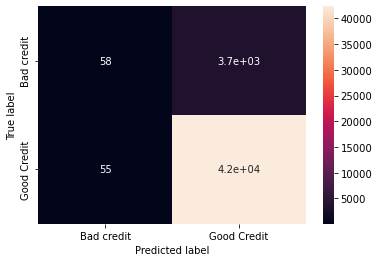

In [158]:
draw_cm (y_pred_df.actual, y_pred_df.predicted )

In [135]:
#Accuracy
a1= (cm[0,0]+cm[1,1])/ (cm[0,0]+cm[0,1]+ cm[1,0]+cm[1,1])

In [136]:
# Recall/ Sensitivity
r1= (cm[0,0])/ (cm[0,0]+cm[0,1])

In [137]:
# Precision
p1= (cm[0,0])/ (cm[0,0]+cm[1,0])

In [141]:
#F1score:

f1= (2* (r1*p1))/ (r1+p1)

In [142]:
a1,r1,p1, f1

(0.9193314111041255,
 0.9987029219630686,
 0.9203285956448037,
 0.015574650912996778,
 0.9579153330241921)

In [146]:
metrics=['Accuracy','Recall', 'Precision', 'F1 Score']
values1=[a1,r1,p1,f1]

In [147]:
metric = pd.DataFrame({'Metrics' :metrics, 'Values': values1})

In [148]:
metric

,Metrics,Values
0,Accuracy,0.919331
1,Recall,0.998703
2,Precision,0.920329
3,F1 Score,0.957915


In [ ]:
#AUC- ROC Curve

In [191]:
def draw_roc( actual, probs ):
    # Obtain fpr, tpr, thresholds
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    # Plot the fpr and tpr values for different threshold values
    plt.plot( fpr, tpr, label= "ROC curve (area = %0.2f)" % auc_score )
    # draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # Setting x and y labels
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

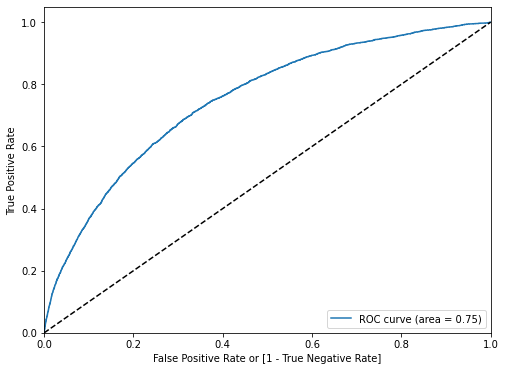

In [164]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)


In [165]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)
round( float( auc_score ), 2 )

0.75

As a thumb rule, AUC of at least 0.7 is required for practical application of the model. For our case, the AUC is 0.75, which implies the model is fairly good.

# 5. Model Test Evaluation

In [ ]:
#Predicting on Test Data:

We will use the final_logit model and siginificant features to predict the class probability.



In [178]:
y_pred_df= pd.DataFrame({"actual": y_test, "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars])) })



In [179]:
y_pred_df.sample(10, random_state=12)



,actual,predicted_prob
82830,0,0.060787
248587,0,0.067209
92095,0,0.059047
295953,0,0.026012
38348,0,0.030650
233425,0,0.062038
230531,0,0.071886
222342,0,0.024800
191618,0,0.055658
260104,0,0.009484


In [180]:
#Let us assume the optimal classification cut-off= 0.5:

y_pred_df['predicted']= y_pred_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)



In [181]:
y_pred_df.sample(10, random_state=12)




,actual,predicted_prob,predicted
82830,0,0.060787,0
248587,0,0.067209,0
92095,0,0.059047,0
295953,0,0.026012,0
38348,0,0.030650,0
233425,0,0.062038,0
230531,0,0.071886,0
222342,0,0.024800,0
191618,0,0.055658,0
260104,0,0.009484,0


In [182]:
cm= confusion_matrix(y_pred_df.actual, y_pred_df.predicted )
cm



array([[42348,    55],
       [ 3672,    52]], dtype=int64)

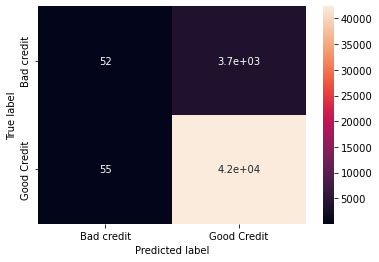

In [190]:
draw_cm(y_pred_df.actual, y_pred_df.predicted )



In [184]:
#Accuracy
a1= (cm[0,0]+cm[1,1])/ (cm[0,0]+cm[0,1]+ cm[1,0]+cm[1,1])

# Recall/ Sensitivity
r1= (cm[0,0])/ (cm[0,0]+cm[0,1])

# Precision
p1= (cm[0,0])/ (cm[0,0]+cm[1,0])

#F1score:

f1= (2* (r1*p1))/ (r1+p1)

a1,r1,p1, f1



(0.9192013354434496,
 0.9987029219630686,
 0.9202086049543676,
 0.9578503330581409)

In [185]:
metrics=['Accuracy','Recall', 'Precision', 'F1 Score']
values1=[a1,r1,p1,f1]

metric = pd.DataFrame({'Metrics' :metrics, 'Values': values1})

metric

,Metrics,Values
0,Accuracy,0.919201
1,Recall,0.998703
2,Precision,0.920209
3,F1 Score,0.957850


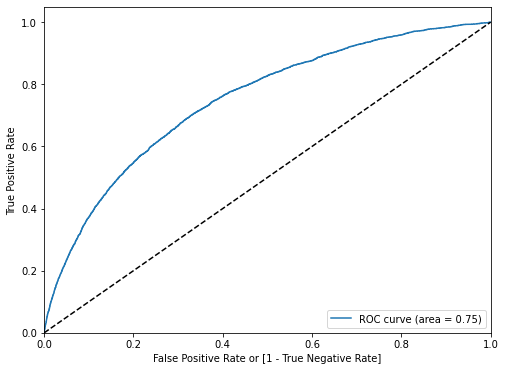

(array([0.00000000e+00, 2.35832370e-05, 2.35832370e-05, ...,
        9.99952834e-01, 9.99976417e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.68528464e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99970030e+00, 9.99700301e-01, 7.43290489e-01, ...,
        2.60368785e-06, 7.58124666e-17, 4.51153857e-46]))

In [192]:
draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)



In [193]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)
round( float( auc_score ), 2 )



0.75

As a thumb rule, AUC of at least 0.7 is required for practical application of the model. For our case, the AUC is 0.75, which implies the model is fairly good.